# IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#TABLE : *NUCLEAR ENERGY PRODUCTION* ✅ OK

Importation de la table qui comporte la production energetique dans le monde.

In [2]:
# Lien du fichier Google Drive (ID du fichier)
file_id = "1ievWbSTFjkZDWCBgCS_gR-Y9l-pev4ZV"
file_url = f'https://drive.google.com/uc?id={file_id}'

# Importer le fichier CSV dans le DataFrame
df_world_nuclear_energy = pd.read_csv(file_url)

**EXPLORATION**


---



In [3]:
df_world_nuclear_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9603 entries, 0 to 9602
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        9603 non-null   object 
 1   Year                          9603 non-null   int64  
 2   electricity_from_nuclear_twh  9603 non-null   float64
 3   share_of_electricity_pct      7146 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 300.2+ KB


In [4]:
df_world_nuclear_energy.shape

(9603, 4)

In [5]:
df_world_nuclear_energy.describe()

,Year,electricity_from_nuclear_twh,share_of_electricity_pct
count,9603.000000,9603.000000,7146.000000
mean,1999.663751,88.804416,5.803472
std,16.114331,337.610707,13.084521
min,1965.000000,0.000000,0.000000
25%,1987.000000,0.000000,0.000000
50%,2003.000000,0.000000,0.000000
75%,2013.000000,3.970000,2.461263
max,2023.000000,2762.240000,88.011480


In [6]:
df_world_nuclear_energy.head()

,Entity,Year,electricity_from_nuclear_twh,share_of_electricity_pct
0,Afghanistan,2000,0.0,0.0
1,Afghanistan,2001,0.0,0.0
2,Afghanistan,2002,0.0,0.0
3,Afghanistan,2003,0.0,0.0
4,Afghanistan,2004,0.0,0.0




---



In [7]:
# Renommage des colonnes
df_world_nuclear_energy = df_world_nuclear_energy.rename(columns={"Entity": "pays","Year": "year","electricity_from_nuclear_twh": "electricite_nucleaire(twh)","share_of_electricity_pct": "part_nucleaire(%)" })

In [8]:
# Remplacer les NaN dans 'part_nucleaire(%)' par 0 si 'electricite_nucleaire(TWh)' est égal à 0
df_world_nuclear_energy.loc[df_world_nuclear_energy['electricite_nucleaire(twh)'] == 0, 'part_nucleaire(%)'] = df_world_nuclear_energy['part_nucleaire(%)'].fillna(0)

In [9]:
# Filtrer les lignes à supprimer
lignes_a_supprimer = df_world_nuclear_energy[(df_world_nuclear_energy['year'] < 1990)].index

# Supprimer les lignes du DataFrame
df_world_nuclear_energy = df_world_nuclear_energy.drop(lignes_a_supprimer)

In [10]:
# --------- CREATION NOUVELLES COLONNES ------------------

# Calculer le total production en twh (Nucleaire + Non Nucleaire)
df_world_nuclear_energy['total_production(twh)'] = df_world_nuclear_energy['electricite_nucleaire(twh)'] / (df_world_nuclear_energy['part_nucleaire(%)'] / 100)

# Calculer la production hors nucléaire en twh
df_world_nuclear_energy['production_hors_nucleaire(twh)'] = df_world_nuclear_energy['total_production(twh)'] - df_world_nuclear_energy['electricite_nucleaire(twh)']

In [11]:
# Remplace les "NAN" des 2 colonnes si la colonne production_hors_nucleaire(twh) n'a pas de valeur.
df_world_nuclear_energy.loc[
    df_world_nuclear_energy['production_hors_nucleaire(twh)'].isna(),
    ['production_hors_nucleaire(twh)', 'total_production(twh)']] = 0

In [12]:
#Réorganisation des colonnes du dataframe
df_world_nuclear_energy = df_world_nuclear_energy[["year", "pays", "electricite_nucleaire(twh)", "part_nucleaire(%)", "production_hors_nucleaire(twh)", "total_production(twh)"]]

In [13]:
filtred_world_mix_energy = df_world_nuclear_energy[
    (df_world_nuclear_energy['electricite_nucleaire(twh)'] > 0) &
    (df_world_nuclear_energy['production_hors_nucleaire(twh)'] > 0)
]

In [14]:
filtred_world_mix_energy.reset_index(drop=True, inplace=True)

In [15]:
# Exclure les non pays du dataframe
valeurs_a_exclure = [
    'Africa','Africa (EI)', 'Africa (Ember)', 'Asia', 'Asia (Ember)', 'Asia Pacific (EI)', 'CIS (EI)', 'Europe',
    'Europe (EI)', 'Europe (Ember)', 'European Union (27)', 'G20 (Ember)', 'G7 (Ember)',
    'High-income countries', 'Latin America and Caribbean (Ember)', 'Lower-middle-income countries',
    'Middle East (EI)', 'Middle East (Ember)', 'Non-OECD (EI)', 'North America', 'North America (EI)',
    'North America (Ember)', 'OECD (EI)', 'OECD (Ember)', 'South Africa', 'South America',
    'South and Central America (EI)', 'Upper-middle-income countries', 'World'
]
#Dataframe par Pays
df_wne_pays = filtred_world_mix_energy[~filtred_world_mix_energy['pays'].isin(valeurs_a_exclure)]

In [16]:
# Remplacer 'South America' et 'North America' par 'America'
filtred_world_mix_energy['pays'] = filtred_world_mix_energy['pays'].replace(
    {'South America': 'America', 'North America': 'America'}
)

valeurs_a_garder = ['Europe', 'Asia', 'Africa','America','World']
# Dataframe avec seulement les continents
df_wne_continents = filtred_world_mix_energy[filtred_world_mix_energy['pays'].isin(valeurs_a_garder)]

<ipython-input-16-e1b44895de2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_world_mix_energy['pays'] = filtred_world_mix_energy['pays'].replace(


In [17]:
valeurs_a_garder_type = ['High-income countries', 'Upper-middle-income countries', 'Lower-middle-income countries']
# Dataframe avec les pays par type de revenues
df_wne_cat_revenues = filtred_world_mix_energy[filtred_world_mix_energy['pays'].isin(valeurs_a_garder_type)]

#TABLE : EMISSIONS CO2 WORLD ✅ OK


In [18]:
# Lien du fichier Google Drive (ID du fichier)
file_id = "1kkbdwvYu3bqTMGdGi1YJp_d_OhDvTi5N"
file_url = f'https://drive.google.com/uc?id={file_id}'

# Importer le fichier CSV dans le DataFrame
df_emissions_co2_world = pd.read_csv(file_url, sep=';')

In [19]:
# Drop des colonnes 'Substance', 'EDGAR Country Code'
df_emissions_co2_world = df_emissions_co2_world.drop(columns=['Substance', 'EDGAR Country Code'], axis = 1)

In [20]:
# Pivoter le DataFrame pour avoir les années dans une colonne 'Year' et les valeurs dans 'emissions_co2'
df_emissions_co2_world = df_emissions_co2_world.melt(id_vars=['Sector', 'Country'],
                   var_name='year',
                   value_name='emissions_co2')
# Remplacer les virgules par des points dans la colonne 'emissions_co2'
df_emissions_co2_world['emissions_co2'] = df_emissions_co2_world['emissions_co2'].str.replace(',', '.', regex=False)
# Convertir la colonne 'Year' en type int
df_emissions_co2_world['year'] = df_emissions_co2_world['year'].astype(int)
df_emissions_co2_world['emissions_co2'] = df_emissions_co2_world['emissions_co2'].astype(float)

In [21]:
# Renommage des colonnes
df_emissions_co2_world = df_emissions_co2_world.rename(columns={"Country": "pays", "emissions_co2": "emissions_co2_(tco2)"})

In [22]:
# Conversion des unités en MT en T
df_emissions_co2_world['emissions_co2_(tco2)'] = df_emissions_co2_world['emissions_co2_(tco2)'] * 1000000



---



#TABLE : NUCLEAR ENERGY CONSOMMATION ✅ OK


In [23]:
# ID du fichier Google Drive
file_id = "18NTnD5PlnNLU_hkposQSNIfKspoy8dpq"
file_url = f'https://drive.google.com/uc?id={file_id}'

# Charger le fichier CSV dans un DataFrame
df_prod_cons = pd.read_csv(file_url)

In [24]:
# Afficher les premières lignes pour vérifier
df_prod_cons.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


<Axes: >

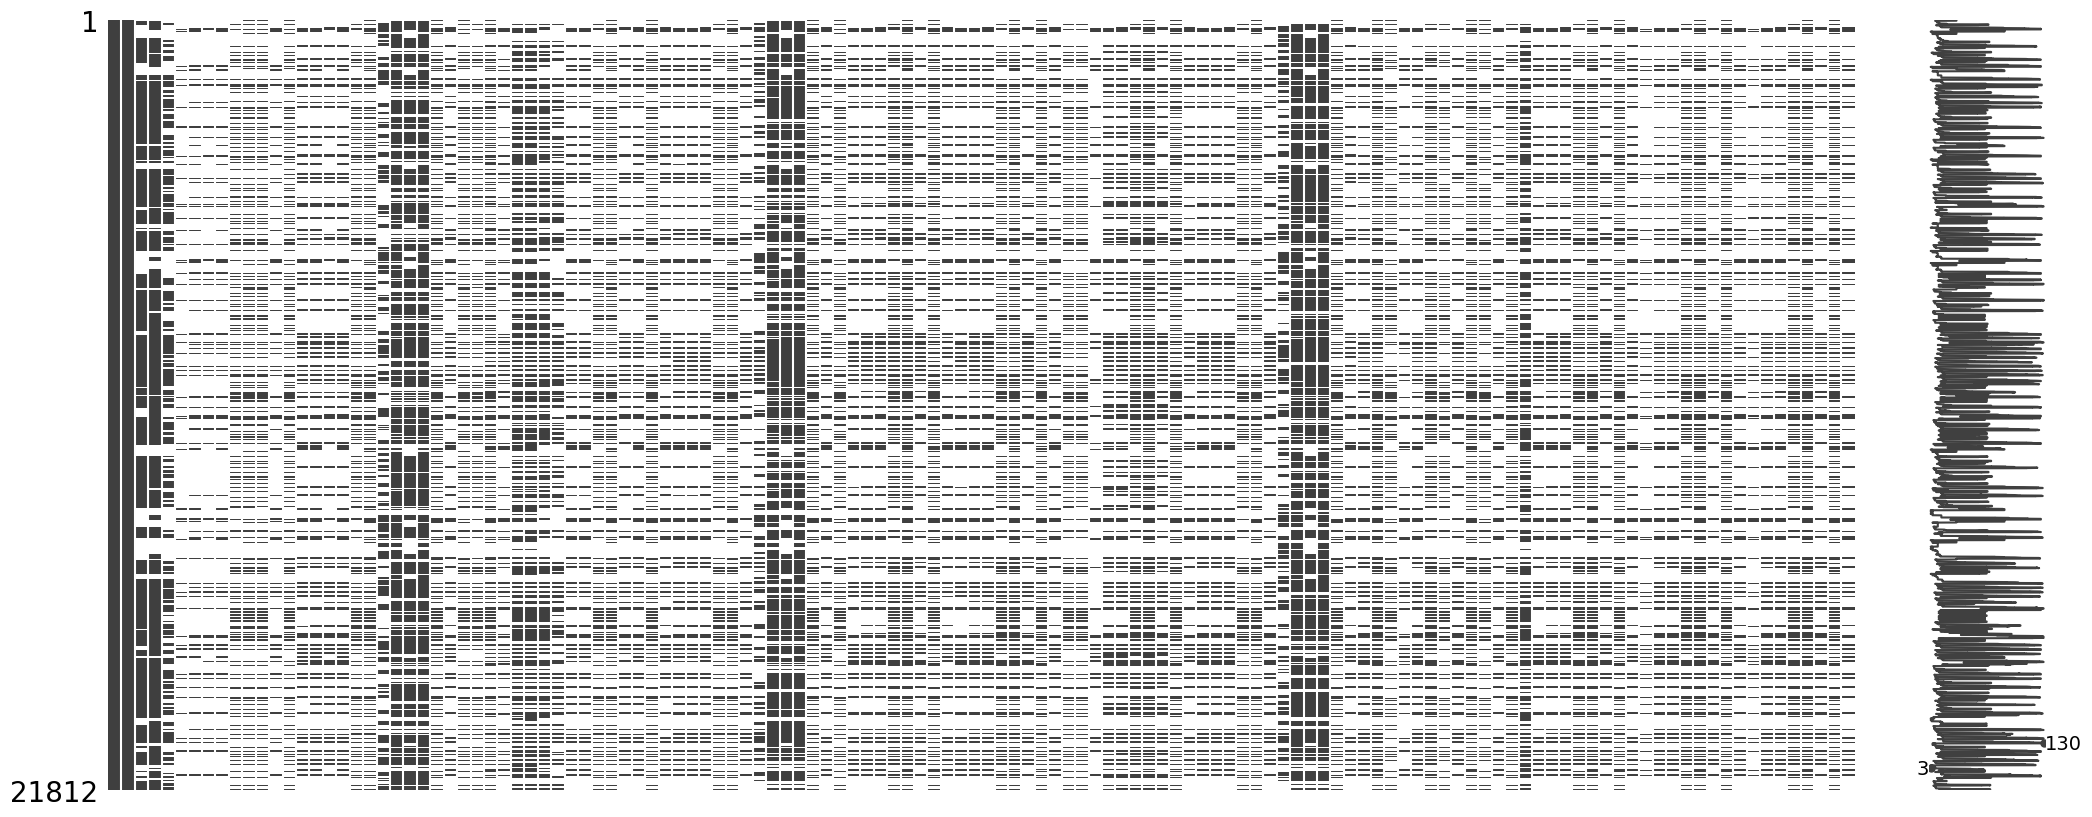

In [25]:
!pip install missingno
import missingno as msno
msno.matrix(df_prod_cons)

In [26]:
# Affiche toutes les colonnes du DataFrame de manière lisible
print("Colonnes disponibles :")
for i, col in enumerate(df_prod_cons.columns, start=1):
    print(f"{i}: {col}")

Colonnes disponibles :
1: country
2: year
3: iso_code
4: population
5: gdp
6: biofuel_cons_change_pct
7: biofuel_cons_change_twh
8: biofuel_cons_per_capita
9: biofuel_consumption
10: biofuel_elec_per_capita
11: biofuel_electricity
12: biofuel_share_elec
13: biofuel_share_energy
14: carbon_intensity_elec
15: coal_cons_change_pct
16: coal_cons_change_twh
17: coal_cons_per_capita
18: coal_consumption
19: coal_elec_per_capita
20: coal_electricity
21: coal_prod_change_pct
22: coal_prod_change_twh
23: coal_prod_per_capita
24: coal_production
25: coal_share_elec
26: coal_share_energy
27: electricity_demand
28: electricity_demand_per_capita
29: electricity_generation
30: electricity_share_energy
31: energy_cons_change_pct
32: energy_cons_change_twh
33: energy_per_capita
34: energy_per_gdp
35: fossil_cons_change_pct
36: fossil_cons_change_twh
37: fossil_elec_per_capita
38: fossil_electricity
39: fossil_energy_per_capita
40: fossil_fuel_consumption
41: fossil_share_elec
42: fossil_share_energy
4

In [27]:
# Colonnes spécifiques à conserver
colonnes_a_garder = [
    'country', 'year', 'population',
    'nuclear_consumption', 'solar_consumption', 'wind_consumption',
    'hydro_consumption', 'coal_consumption', 'oil_consumption', 'gas_consumption']

# Filtrer le DataFrame
df_prod_cons_filtre = df_prod_cons[colonnes_a_garder]

# Vérification
print("Colonnes finales sélectionnées :")
print(df_prod_cons_filtre.columns)

# Aperçu des premières lignes
df_prod_cons_filtre.head()

Colonnes finales sélectionnées :
Index(['country', 'year', 'population', 'nuclear_consumption',
       'solar_consumption', 'wind_consumption', 'hydro_consumption',
       'coal_consumption', 'oil_consumption', 'gas_consumption'],
      dtype='object')


,country,year,population,nuclear_consumption,solar_consumption,wind_consumption,hydro_consumption,coal_consumption,oil_consumption,gas_consumption
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_prod_cons_filtre['country'].unique()

array(['ASEAN (Ember)', 'Afghanistan', 'Africa', 'Africa (EI)',
       'Africa (EIA)', 'Africa (Ember)', 'Africa (Shift)', 'Albania',
       'Algeria', 'American Samoa', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia & Oceania (EIA)', 'Asia (Ember)', 'Asia Pacific (EI)',
       'Asia and Oceania (Shift)', 'Australia',
       'Australia and New Zealand (EIA)', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central & South America (EIA)',
       'Central African Republic', 'Central America (EI)',
       'Central and South America (Shift)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoro

In [29]:
# Supprimer les lignes où l'année est inférieure à 1990
df_prod_cons_filtre = df_prod_cons_filtre[df_prod_cons_filtre['year'] >= 1990]

In [30]:
# Supprimer les lignes où l'année est supérieur à 2020
df_prod_cons_filtre = df_prod_cons_filtre[df_prod_cons_filtre['year'] <= 2020]
df_prod_cons_filtre.head()

,country,year,population,nuclear_consumption,solar_consumption,wind_consumption,hydro_consumption,coal_consumption,oil_consumption,gas_consumption
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Liste des pays/labels à exclure
exclude_list = [
    "Africa (EI)", "Africa (EIA)", "Africa (Ember)", "Africa (Shift)", "ASEAN (Ember)",
    "Asia & Oceania (EIA)", "Asia (Ember)", "Asia and Oceania (Shift)", "Asia Pacific (EI)",
    "Australia and New Zealand (EIA)", "Central & South America (EIA)", "Central America (EI)",
    "Central and South America (Shift)", "CIS (EI)", "East Germany", "Eastern Africa (EI)",
    "Eurasia (EIA)", "Eurasia (Shift)", "Europe (EI)", "Europe (EIA)", "Europe (Ember)", "Europe (Shift)",
    "Latin America and Caribbean (Ember)", "Low-income countries", "Lower-middle-income countries",
    "Middle Africa (EI)", "Middle East (EI)", "Middle East (EIA)", "Middle East (Ember)", "Middle East (Shift)",
    "Non-OECD (EI)", "Non-OECD (EIA)", "Non-OPEC (EI)", "Non-OPEC (EIA)", "North America (EI)",
    "North America (Ember)", "North America (Shift)", "Oceania (Ember)", "OECD (EI)", "OECD (EIA)",
    "OECD (Ember)", "OECD (Shift)", "OPEC (EI)", "OPEC (EIA)", "OPEC (Shift)", "Persian Gulf (EIA)",
    "Persian Gulf (Shift)", "South and Central America (EI)", "U.S. Pacific Islands (EIA)",
    "U.S. Territories (EIA)", "United States Pacific Islands (Shift)", "United States Territories (Shift)",
    "Wake Island (EIA)", "Wake Island (Shift)", "Western Africa (EI)"
]

# Filtrer les données pour supprimer les lignes avec ces valeurs dans la colonne 'country'
df_filtered = df_prod_cons_filtre[~df_prod_cons_filtre['country'].isin(exclude_list)]

# Afficher un aperçu pour vérifier
print(df_filtered.head())

         country  year  population  nuclear_consumption  solar_consumption  \
114  Afghanistan  1990  10694804.0                  NaN                NaN   
115  Afghanistan  1991  10745168.0                  NaN                NaN   
116  Afghanistan  1992  12057436.0                  NaN                NaN   
117  Afghanistan  1993  14003764.0                  NaN                NaN   
118  Afghanistan  1994  15455560.0                  NaN                NaN   

     wind_consumption  hydro_consumption  coal_consumption  oil_consumption  \
114               NaN                NaN               NaN              NaN   
115               NaN                NaN               NaN              NaN   
116               NaN                NaN               NaN              NaN   
117               NaN                NaN               NaN              NaN   
118               NaN                NaN               NaN              NaN   

     gas_consumption  
114              NaN  
115       

In [32]:
df_filtered.dtypes

,0
country,object
year,int64
population,float64
nuclear_consumption,float64
solar_consumption,float64
wind_consumption,float64
hydro_consumption,float64
coal_consumption,float64
oil_consumption,float64
gas_consumption,float64


In [33]:
# Convertir la colonne 'year' en type date (seulement l'année)
df_filtered['year'] = pd.to_datetime(df_filtered['year'], format='%Y').dt.year

# Convertir la colonne 'population' en entier
df_filtered['population'] = df_filtered['population'].fillna(0).astype(int)

# Afficher un aperçu pour vérifier
print(df_filtered.dtypes)
print(df_filtered.head())

country                 object
year                     int32
population               int64
nuclear_consumption    float64
solar_consumption      float64
wind_consumption       float64
hydro_consumption      float64
coal_consumption       float64
oil_consumption        float64
gas_consumption        float64
dtype: object
         country  year  population  nuclear_consumption  solar_consumption  \
114  Afghanistan  1990    10694804                  NaN                NaN   
115  Afghanistan  1991    10745168                  NaN                NaN   
116  Afghanistan  1992    12057436                  NaN                NaN   
117  Afghanistan  1993    14003764                  NaN                NaN   
118  Afghanistan  1994    15455560                  NaN                NaN   

     wind_consumption  hydro_consumption  coal_consumption  oil_consumption  \
114               NaN                NaN               NaN              NaN   
115               NaN                NaN         

<ipython-input-33-bfc6e4e459a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = pd.to_datetime(df_filtered['year'], format='%Y').dt.year
<ipython-input-33-bfc6e4e459a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['population'] = df_filtered['population'].fillna(0).astype(int)


In [34]:
df_filtered.columns

Index(['country', 'year', 'population', 'nuclear_consumption',
       'solar_consumption', 'wind_consumption', 'hydro_consumption',
       'coal_consumption', 'oil_consumption', 'gas_consumption'],
      dtype='object')

In [35]:
# Liste des colonnes à vérifier
cols_to_check = [
    'nuclear_consumption', 'solar_consumption', 'wind_consumption',
    'hydro_consumption', 'coal_consumption', 'oil_consumption', 'gas_consumption'
]

# Supprimer les lignes où toutes ces colonnes sont NaN
df_filtered = df_filtered.dropna(subset=cols_to_check, how='all')

# Afficher un aperçu pour vérifier
print(df_filtered)
print(f"Nombre de lignes après suppression : {len(df_filtered)}")

        country  year  population  nuclear_consumption  solar_consumption  \
237      Africa  1990   638157571               23.974                0.0   
238      Africa  1991   655040869               25.946                0.0   
239      Africa  1992   671931834               26.355                0.0   
240      Africa  1993   689140286               20.586                0.0   
241      Africa  1994   706488557               27.515                0.0   
...         ...   ...         ...                  ...                ...   
21804  Zimbabwe  2016    14452705                0.000                NaN   
21805  Zimbabwe  2017    14751101                0.000                NaN   
21806  Zimbabwe  2018    15052191                0.000                NaN   
21807  Zimbabwe  2019    15354606                0.000                NaN   
21808  Zimbabwe  2020    15669663                0.000                NaN   

       wind_consumption  hydro_consumption  coal_consumption  oil_consumpti

In [36]:
# Exporter le DataFrame en CSV
df_filtered.to_csv('energy_consommation_filtered.csv', index=False, encoding = 'utf-8-sig' )

# Télécharger le fichier
files.download('energy_consommation_filtered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3534 entries, 237 to 21808
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              3534 non-null   object 
 1   year                 3534 non-null   int32  
 2   population           3534 non-null   int64  
 3   nuclear_consumption  3534 non-null   float64
 4   solar_consumption    2742 non-null   float64
 5   wind_consumption     2759 non-null   float64
 6   hydro_consumption    2585 non-null   float64
 7   coal_consumption     2661 non-null   float64
 8   oil_consumption      2759 non-null   float64
 9   gas_consumption      2646 non-null   float64
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 289.9+ KB


In [38]:
df_filtered.head()

,country,year,population,nuclear_consumption,solar_consumption,wind_consumption,hydro_consumption,coal_consumption,oil_consumption,gas_consumption
237,Africa,1990,638157571,23.974,0.0,0.000,169.301,877.678,1135.959,398.645
238,Africa,1991,655040869,25.946,0.0,0.000,179.346,853.762,1141.910,401.636
239,Africa,1992,671931834,26.355,0.0,0.000,171.092,858.831,1164.203,421.270
240,Africa,1993,689140286,20.586,0.0,0.006,167.610,871.714,1176.172,412.644
241,Africa,1994,706488557,27.515,0.0,0.016,170.311,894.448,1214.283,431.828


# TABLE : Facility

In [39]:
# ID du fichier Google Drive
file_id = "14GeCsqCc0ICARshI8SJlLy1sFO9VgsFB"
file_url = f'https://drive.google.com/uc?id={file_id}'

# Charger le fichier CSV dans un DataFrame
df_plant = pd.read_excel(file_url)

In [40]:
df_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country/Facility    37 non-null     object
 1   Type                23 non-null     object
 2   Status              23 non-null     object
 3   Safeguards          23 non-null     object
 4   Capacity, tSWU/yr]  22 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [41]:
df_plant.shape

(37, 5)

In [42]:
# Creation du colonne pays vide
df_plant['Country'] = np.nan

# Iteration des lignes sur le dataframe
current_country = None
for index, row in df_plant.iterrows():
    # verification du type de chaque ligne
    if pd.isna(row['Type']):
        current_country = row['Country/Facility']  # mise à jour du nom du pays

    # verification du noms du pays par ligne et remplacement avec un nouveau nom à chaque ligne ou un autre nom est disponible
    if current_country:
        df_plant.loc[index, 'Country'] = current_country

df_plant

<ipython-input-42-d7b5219ad40b>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Argentina' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_plant.loc[index, 'Country'] = current_country


,Country/Facility,Type,Status,Safeguards,"Capacity, tSWU/yr]",Country
0,Argentina,NaN,NaN,NaN,NaN,Argentina
1,Pilcaniyeu,Civilian,Uncertain,yes,20,Argentina
2,Brazil,NaN,NaN,NaN,NaN,Brazil
3,Resende,Civilian,Expanding capacity,yes,50-60,Brazil
4,China,NaN,NaN,NaN,NaN,China
5,Hanzhong (Shaanxi),Civilian,Operating,(yes),2700,China
6,Lanzhou,Civilian,Operating,offered,4400,China
7,Emeishan,Civilian,Operating,no,4000,China
8,Heping,Dual-use,Operating,no,230,China
9,France,NaN,NaN,NaN,NaN,France


In [43]:
# suprpression des lignes ou le nom du pays se repète
df_plant = df_plant[df_plant['Country'] != df_plant['Country/Facility']]

In [44]:
#réorganisation des colonnes avec country comme première ligne
cols = list(df_plant.columns)
cols.insert(0, cols.pop(cols.index('Country')))
df_plant = df_plant.loc[:, cols]

df_plant

,Country,Country/Facility,Type,Status,Safeguards,"Capacity, tSWU/yr]"
1,Argentina,Pilcaniyeu,Civilian,Uncertain,yes,20
3,Brazil,Resende,Civilian,Expanding capacity,yes,50-60
5,China,Hanzhong (Shaanxi),Civilian,Operating,(yes),2700
6,China,Lanzhou,Civilian,Operating,offered,4400
7,China,Emeishan,Civilian,Operating,no,4000
8,China,Heping,Dual-use,Operating,no,230
10,France,George Besse II,Civilian,Operating,yes,7500
12,Germany,Gronau,Civilian,Operating,yes,3700
14,India,Ratehalli,Military,Operating,no,15-30
16,Iran,Natanz,Civilian,Expanding capacity,yes,27


Complément des données manquantes via des recherches internet et approximation simples

In [45]:
df_plant.rename(columns={'Capacity, tSWU/yr]': 'Capacity'}, inplace=True)
df_plant.loc[17, 'Capacity'] = 2.7
df_plant.loc[23, 'Capacity'] = 8
df_plant.loc[25, 'Capacity'] = 30
df_plant.loc[26, 'Capacity'] = np.nan
df_plant.loc[36, 'Capacity'] = 4.5
df_plant.loc[3, 'Capacity'] = 55
df_plant.loc[14, 'Capacity'] = 22.5
df_plant

,Country,Country/Facility,Type,Status,Safeguards,Capacity
1,Argentina,Pilcaniyeu,Civilian,Uncertain,yes,20
3,Brazil,Resende,Civilian,Expanding capacity,yes,55
5,China,Hanzhong (Shaanxi),Civilian,Operating,(yes),2700
6,China,Lanzhou,Civilian,Operating,offered,4400
7,China,Emeishan,Civilian,Operating,no,4000
8,China,Heping,Dual-use,Operating,no,230
10,France,George Besse II,Civilian,Operating,yes,7500
12,Germany,Gronau,Civilian,Operating,yes,3700
14,India,Ratehalli,Military,Operating,no,22.5
16,Iran,Natanz,Civilian,Expanding capacity,yes,27


In [46]:
df_plant.to_csv('df_plant.csv', index=False, encoding = 'utf-8-sig' )

# Télécharger le fichier
files.download('df_plant.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#TABLE : PRODUCTION URANIUM PAR PAYS ✅ OK

In [47]:
# ID du fichier Google Drive
file_id = "1qGqzbXZdmTO8bTYuzOhTQNtcc6Icmj3l"
file_url = f'https://drive.google.com/uc?id={file_id}'

# Charger le fichier CSV dans un DataFrame
df_uranium = pd.read_csv(file_url)

#TABLE : PRODUCTION URANIUM PAR CONTINENT ✅ OK

In [48]:
# ID du fichier Google Drive
file_id = "1g_ENH0hHiEpGAQ7oaWDQmyBVouEjSQce"
file_url = f'https://drive.google.com/uc?id={file_id}'

# Charger le fichier CSV dans un DataFrame
df_uranium_continent = pd.read_csv(file_url)

#TABLE : URANIUM PRICE ✅ OK

In [49]:
# ID du fichier Google Drive
file_id = "1RqN12EfjbowloxcloNMSdtY3tMCSV0-I"
file_url = f'https://drive.google.com/uc?id={file_id}'

# Charger le fichier CSV dans un DataFrame
df_price = pd.read_csv(file_url)

# 1. Impact environnemental de l'énergie nucléaire


In [50]:
df_wne_pays

,year,pays,electricite_nucleaire(twh),part_nucleaire(%),production_hors_nucleaire(twh),total_production(twh)
90,1990,Argentina,7.281,14.275102,43.723889,51.004889
91,1991,Argentina,7.756,14.401829,46.098271,53.854271
92,1992,Argentina,7.081,12.620506,49.026101,56.107101
93,1993,Argentina,7.750,12.526512,54.118779,61.868779
94,1994,Argentina,8.235,12.549138,57.387037,65.622037
...,...,...,...,...,...,...
1785,2019,United States,809.410,19.464552,3348.969808,4158.379808
1786,2020,United States,789.880,19.536108,3253.299941,4043.179941
1787,2021,United States,779.650,18.770372,3373.970397,4153.620397
1788,2022,United States,771.540,17.997578,3515.370161,4286.910161


In [51]:
df_emissions_co2_world

,Sector,pays,year,emissions_co2_(tco2)
0,Agriculture,Afghanistan,1970,29228.567
1,Agriculture,Albania,1970,113300.000
2,Agriculture,Argentina,1970,104342.850
3,Agriculture,Armenia,1970,55288.203
4,Agriculture,Australia,1970,311142.842
...,...,...,...,...
253229,Waste,Samoa,2022,3009.239
253230,Waste,Yemen,2022,281241.493
253231,Waste,South Africa,2022,767653.064
253232,Waste,Zambia,2022,200486.005


In [52]:
# prompt: 	Pour le dataframe "df_emissions_co2_world" remplace la valeur "France and Monaco" dans la colonne "Pays" par "France"

df_emissions_co2_world['pays'] = df_emissions_co2_world['pays'].replace('France and Monaco', 'France')

In [53]:
# Merge energy et emissions co2
df_impact_nuclear = pd.merge(df_wne_pays, df_emissions_co2_world, on=['year', 'pays'], how='left')

In [54]:
df_impact_nuclear

,year,pays,electricite_nucleaire(twh),part_nucleaire(%),production_hors_nucleaire(twh),total_production(twh),Sector,emissions_co2_(tco2)
0,1990,Argentina,7.281,14.275102,43.723889,51.004889,Agriculture,1.750571e+05
1,1990,Argentina,7.281,14.275102,43.723889,51.004889,Buildings,2.203059e+07
2,1990,Argentina,7.281,14.275102,43.723889,51.004889,Fuel Exploitation,1.279351e+07
3,1990,Argentina,7.281,14.275102,43.723889,51.004889,Industrial Combustion,1.410540e+07
4,1990,Argentina,7.281,14.275102,43.723889,51.004889,Power Industry,1.880808e+07
...,...,...,...,...,...,...,...,...
22800,2022,United States,771.540,17.997578,3515.370161,4286.910161,Power Industry,7.121758e+06
22801,2022,United States,771.540,17.997578,3515.370161,4286.910161,Processes,3.759497e+07
22802,2022,United States,771.540,17.997578,3515.370161,4286.910161,Transport,2.179997e+07
22803,2022,United States,771.540,17.997578,3515.370161,4286.910161,Waste,9.314114e+06


In [55]:
# Filtrer les lignes à supprimer
only_power = df_impact_nuclear[(df_impact_nuclear['Sector'] !='Power Industry')].index

# Supprimer les lignes du DataFrame
df_impact_nuclear = df_impact_nuclear.drop(only_power)

In [56]:
# Reset de l'index
df_impact_nuclear.reset_index(drop=True, inplace=True)

In [57]:
df_agg = df_impact_nuclear.groupby(['pays','year'], as_index=False).agg({
    'electricite_nucleaire(twh)': 'mean',  # assume que c'est identique sur toutes les lignes de l'année/pays
    'part_nucleaire(%)': 'mean',  # même hypothèse
    'production_hors_nucleaire(twh)': 'mean',
    'total_production(twh)': 'mean',
    'emissions_co2_(tco2)': 'sum'  # on somme les émissions
})

In [58]:
# Création DF
df_evo_co2 = df_agg[['pays','year','part_nucleaire(%)','emissions_co2_(tco2)']]

In [59]:
# Dataframe avec la part du nucléaire et son emissions global toute energie confondu
df_evo_co2

,pays,year,part_nucleaire(%),emissions_co2_(tco2)
0,Argentina,1990,14.275102,1.884496e+07
1,Argentina,1991,14.401829,2.092517e+07
2,Argentina,1992,12.620506,1.963619e+07
3,Argentina,1993,12.526512,2.017780e+07
4,Argentina,1994,12.549138,2.064993e+07
...,...,...,...,...
912,United States,2018,19.209103,1.856692e+09
913,United States,2019,19.464552,1.708957e+09
914,United States,2020,19.536108,1.533901e+09
915,United States,2021,18.770372,1.644763e+09


In [60]:
df_evo_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pays                  917 non-null    object 
 1   year                  917 non-null    int64  
 2   part_nucleaire(%)     917 non-null    float64
 3   emissions_co2_(tco2)  917 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.8+ KB


In [61]:
#------- CREATION d'une colonne afin d'analyser le pourcentage d'évolution entre la période précédente. --------------


# Calculate the percentage change in emissions compared to the previous year
df_evo_co2['pct_change_emissions'] = df_evo_co2.groupby('pays')['emissions_co2_(tco2)'].pct_change() * 100

# Fill NaN values (first year for each country) with 0
df_evo_co2['pct_change_emissions'] = df_evo_co2['pct_change_emissions'].fillna(0)

<ipython-input-61-b74d5f125543>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evo_co2['pct_change_emissions'] = df_evo_co2.groupby('pays')['emissions_co2_(tco2)'].pct_change() * 100
<ipython-input-61-b74d5f125543>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evo_co2['pct_change_emissions'] = df_evo_co2['pct_change_emissions'].fillna(0)


In [62]:
nuclear_emissions_per_country = df_evo_co2

In [63]:
# analyse en pourcentage du changement par rapport à l'année précédente pour la colonne part_nucleaire_mean

# Calculate the percentage change in 'part_nucleaire_mean' compared to the previous year
nuclear_emissions_per_country['pct_change_part_nucleaire'] = nuclear_emissions_per_country['part_nucleaire(%)'].pct_change() * 100

# Fill NaN values (first year) with 0
nuclear_emissions_per_country['pct_change_part_nucleaire'] = nuclear_emissions_per_country['pct_change_part_nucleaire'].fillna(0)

# Round the percentage change to 2 decimal places
nuclear_emissions_per_country['pct_change_part_nucleaire'] = nuclear_emissions_per_country['pct_change_part_nucleaire'].round(2)

<ipython-input-63-f7d95d5e0973>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuclear_emissions_per_country['pct_change_part_nucleaire'] = nuclear_emissions_per_country['part_nucleaire(%)'].pct_change() * 100
<ipython-input-63-f7d95d5e0973>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuclear_emissions_per_country['pct_change_part_nucleaire'] = nuclear_emissions_per_country['pct_change_part_nucleaire'].fillna(0)
<ipython-input-63-f7d95d5e0973>:10: SettingWithCopyWarning: 
A value is trying to be set 

In [64]:
nuclear_emissions_per_country.head()

,pays,year,part_nucleaire(%),emissions_co2_(tco2),pct_change_emissions,pct_change_part_nucleaire
0,Argentina,1990,14.275102,1.884496e+07,0.000000,0.00
1,Argentina,1991,14.401829,2.092517e+07,11.038546,0.89
2,Argentina,1992,12.620506,1.963619e+07,-6.159927,-12.37
3,Argentina,1993,12.526512,2.017780e+07,2.758242,-0.74
4,Argentina,1994,12.549138,2.064993e+07,2.339844,0.18


EXPORT PREMIER CSV POUR VISUALISATION PAR PAYS


---



In [65]:
# Exporter le DataFrame en CSV
nuclear_emissions_per_country.to_csv('nuclear_emissions_per_country(2).csv', index=False, encoding = 'utf-8-sig' )

# Télécharger le fichier
files.download('nuclear_emissions_per_country(2).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



In [66]:
# Création d'un DATAFRAME qui regroupe tout les pays par année
df_grouped_world = df_evo_co2.groupby('year').agg(
    part_nucleaire_mean=('part_nucleaire(%)', 'mean'),  # Rename aggregated column
    emissions_co2_sum=('emissions_co2_(tco2)', 'sum')  # Rename aggregated column
).reset_index()

In [67]:
# Calculate the percentage change in emissions compared to the previous year
df_grouped_world['pct_change_emissions'] = df_grouped_world['emissions_co2_sum'].pct_change() * 100

# Fill NaN values (first year) with 0
df_grouped_world['pct_change_emissions'] = df_grouped_world['pct_change_emissions'].fillna(0)

# Round the percentage change to 2 decimal places
df_grouped_world['pct_change_emissions'] = df_grouped_world['pct_change_emissions']

In [68]:
# analyse en pourcentage du changement par rapport à l'année précédente pour la colonne part_nucleaire_mean

# Calculate the percentage change in 'part_nucleaire_mean' compared to the previous year
df_grouped_world['pct_change_part_nucleaire'] = df_grouped_world['part_nucleaire_mean'].pct_change() * 100

# Fill NaN values (first year) with 0
df_grouped_world['pct_change_part_nucleaire'] = df_grouped_world['pct_change_part_nucleaire'].fillna(0)

# Round the percentage change to 2 decimal places
df_grouped_world['pct_change_part_nucleaire'] = df_grouped_world['pct_change_part_nucleaire'].round(2)

In [69]:
nuclear_emissions_world = df_grouped_world.round(2)

In [70]:
nuclear_emissions_world.head()

,year,part_nucleaire_mean,emissions_co2_sum,pct_change_emissions,pct_change_part_nucleaire
0,1990,28.56,5.254267e+09,0.00,0.00
1,1991,27.46,5.460117e+09,3.92,-3.85
2,1992,27.56,5.472328e+09,0.22,0.38
3,1993,27.35,6.268344e+09,14.55,-0.77
4,1994,27.17,6.341850e+09,1.17,-0.66


EXPORT CSV POUR VISUALISATION EMISSIONS WORLD


---



In [71]:
from google.colab import files

# Exporter le DataFrame en CSV
nuclear_emissions_world.to_csv('nuclear_emissions_world.csv', index=False, encoding = 'utf-8-sig' )

# Télécharger le fichier
files.download('nuclear_emissions_world.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



CORRELATION PART DU NUCLEAIRE VS EMISSIONS CO2


In [72]:
#a partir du dataframe df_grouped_world faire la correlation entre la colonne "part_nucleaire_mean" et la colonne "emissions_co2_sum"

correlation_1 = df_grouped_world['part_nucleaire_mean'].corr(df_grouped_world['emissions_co2_sum'])
print(f"La corrélation entre 'part_nucleaire_mean' et 'emissions_co2_sum' est : {correlation_1}")

La corrélation entre 'part_nucleaire_mean' et 'emissions_co2_sum' est : -0.8205555348103094


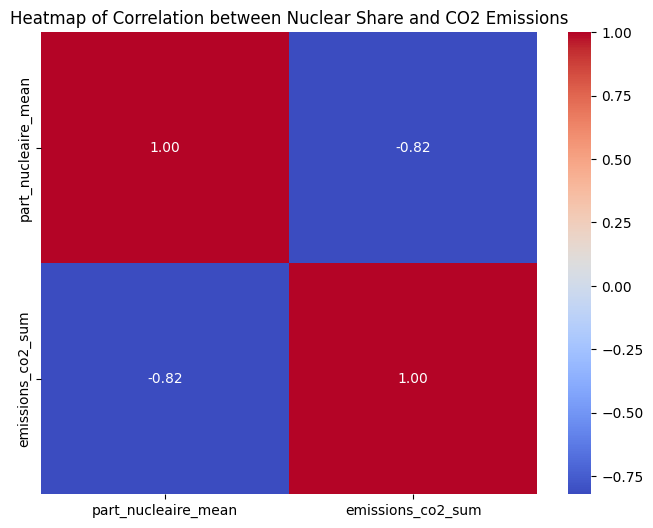

In [73]:
# heatmap de la dt correlation_1

plt.figure(figsize=(8, 6))
sns.heatmap(df_grouped_world[['part_nucleaire_mean', 'emissions_co2_sum']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Nuclear Share and CO2 Emissions')
plt.show()

In [74]:
# prompt: correlation entre la colonne "pct_change_emissions" et la colonne "pct_change_part_nucleaire"

# Calculate the correlation between 'pct_change_emissions' and 'pct_change_part_nucleaire'
correlation_2 = df_grouped_world['pct_change_emissions'].corr(df_grouped_world['pct_change_part_nucleaire'])

print(f"La corrélation entre 'pct_change_emissions' et 'pct_change_part_nucleaire' est : {correlation_2}")

La corrélation entre 'pct_change_emissions' et 'pct_change_part_nucleaire' est : -0.3691626467618257


                               year  part_nucleaire_mean  emissions_co2_sum  \
year                       1.000000            -0.822659           0.987236   
part_nucleaire_mean       -0.822659             1.000000          -0.820556   
emissions_co2_sum          0.987236            -0.820556           1.000000   
pct_change_emissions      -0.188826             0.081849          -0.119120   
pct_change_part_nucleaire -0.081101             0.255320          -0.110535   

                           pct_change_emissions  pct_change_part_nucleaire  
year                                  -0.188826                  -0.081101  
part_nucleaire_mean                    0.081849                   0.255320  
emissions_co2_sum                     -0.119120                  -0.110535  
pct_change_emissions                   1.000000                  -0.369163  
pct_change_part_nucleaire             -0.369163                   1.000000  


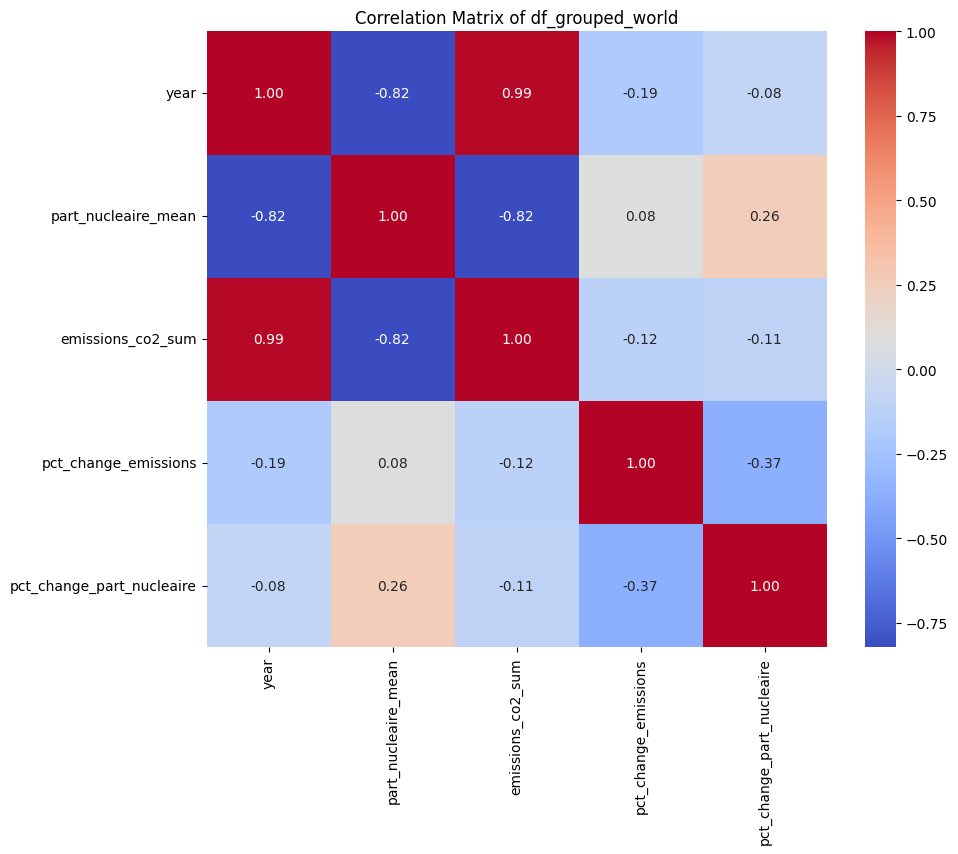

In [75]:
#matrice de correlation entre les différentes colonnes du dataframe "df_grouped_world"

# Calculate the correlation matrix
correlation_matrix = df_grouped_world.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of df_grouped_world')
plt.show()

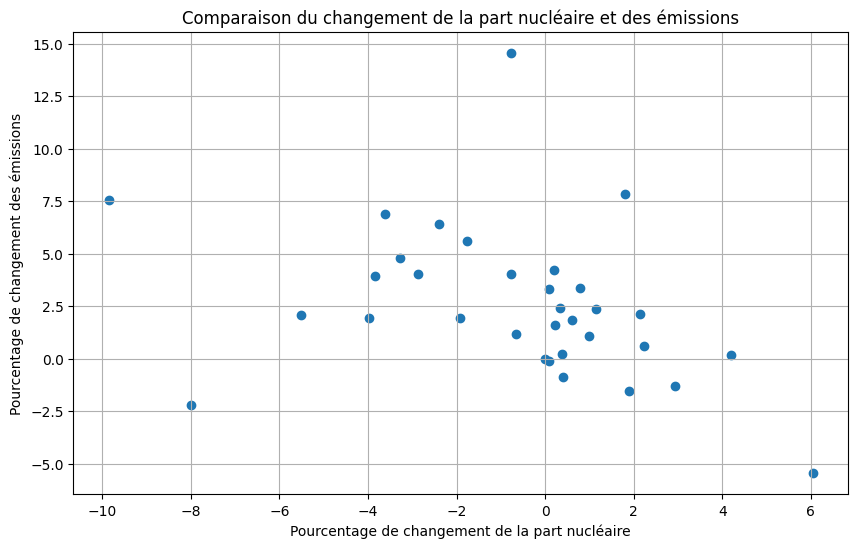

In [76]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_grouped_world['pct_change_part_nucleaire'], df_grouped_world['pct_change_emissions'])

# Add labels and title
plt.xlabel('Pourcentage de changement de la part nucléaire')
plt.ylabel('Pourcentage de changement des émissions')
plt.title('Comparaison du changement de la part nucléaire et des émissions')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

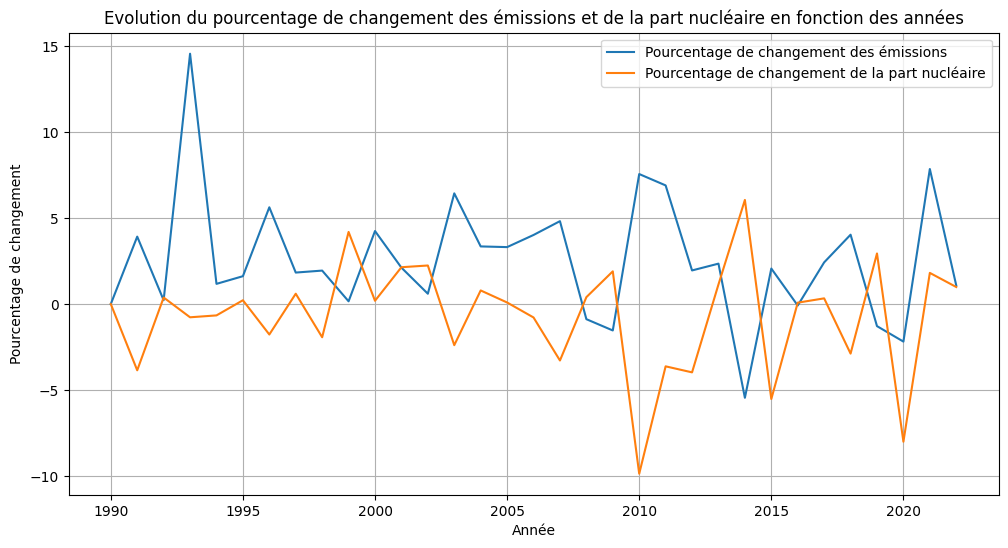

In [77]:
# visualisation afin de comprarer les colonnes "pct_change_emissions" et "pct_change_part_nucleaire" du dataframe "df_grouped_world" qui indique un changement par rapport à l'année précédente et qui montre si la part du nucleaire à une influence sur les emissions

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_world['year'], df_grouped_world['pct_change_emissions'], label='Pourcentage de changement des émissions')
plt.plot(df_grouped_world['year'], df_grouped_world['pct_change_part_nucleaire'], label='Pourcentage de changement de la part nucléaire')

# Customize the plot
plt.xlabel('Année')
plt.ylabel('Pourcentage de changement')
plt.title('Evolution du pourcentage de changement des émissions et de la part nucléaire en fonction des années')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# 2. Exploitation de l'Uranium

In [78]:
df_plant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 36
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           23 non-null     object
 1   Country/Facility  23 non-null     object
 2   Type              23 non-null     object
 3   Status            23 non-null     object
 4   Safeguards        23 non-null     object
 5   Capacity          21 non-null     object
dtypes: object(6)
memory usage: 1.8+ KB


In [79]:
df_uranium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        1428 non-null   int64  
 1   Country     1428 non-null   object 
 2   Production  857 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.6+ KB


In [80]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    35 non-null     int64  
 1   prix    35 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


<ipython-input-81-d29832cd94ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_capacity_sorted.index, y=country_capacity_sorted.values, palette="viridis")


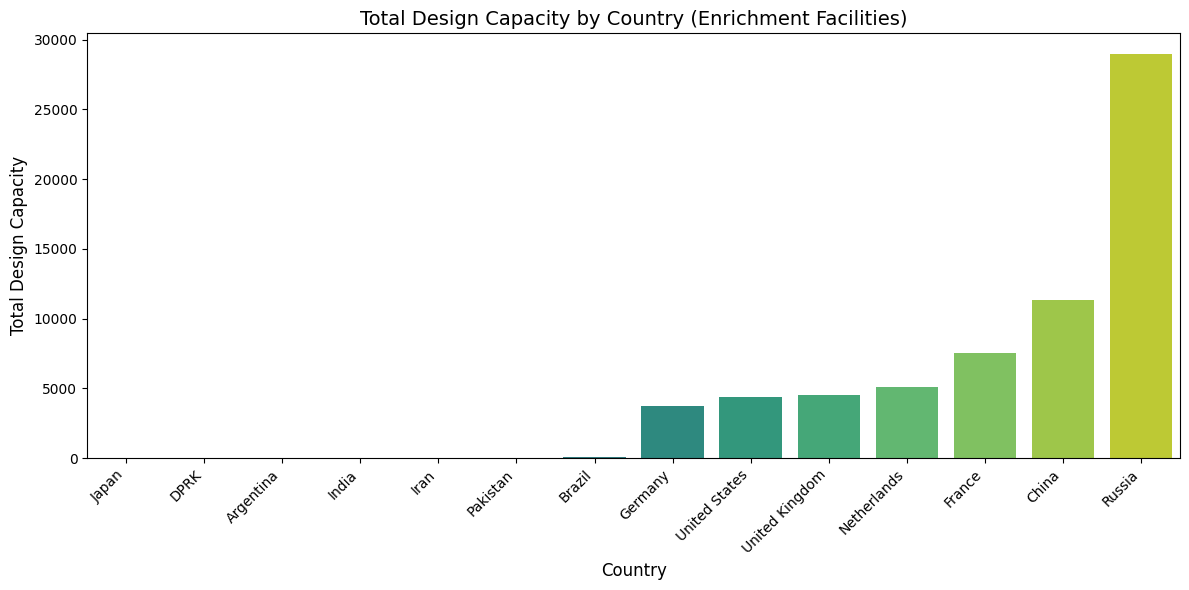

In [81]:
country_capacity = df_plant.groupby('Country')['Capacity'].sum()
# Aggregation de la capacité des pays
country_capacity_sorted = country_capacity.sort_values()
# Tri des valeurs
plt.figure(figsize=(12, 6))
sns.barplot(x=country_capacity_sorted.index, y=country_capacity_sorted.values, palette="viridis")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Design Capacity", fontsize=12)
plt.title("Total Design Capacity by Country (Enrichment Facilities)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

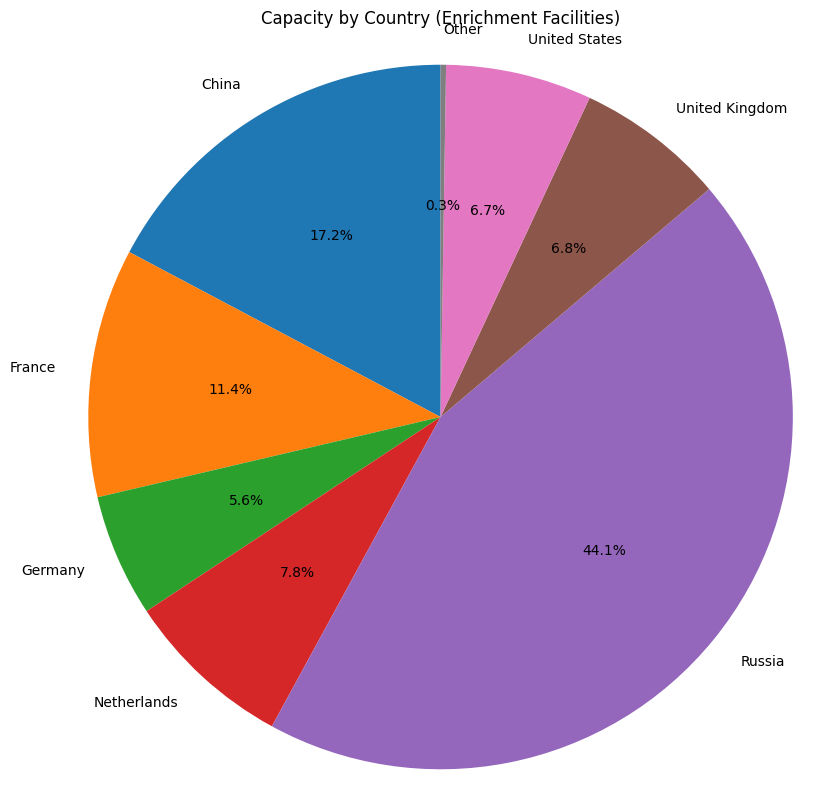

In [82]:
country_capacity_pie = df_plant.groupby('Country')['Capacity'].sum()
# Aggregation de la capacité des pays

total_capacity_pie = country_capacity.sum()
#définition de la valeur total

percentages_pie = (country_capacity_pie / total_capacity_pie) * 100
#création des valeurs en pourcentage

filtered_percentages = percentages_pie[percentages_pie >= 1]
other_percentage = 100 - filtered_percentages.sum()
filtered_percentages['Other'] = other_percentage
#filtrage des valeurs en dessous de 1%

plt.figure(figsize=(10, 10))
plt.pie(filtered_percentages, labels=filtered_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title("Capacity by Country (Enrichment Facilities)")
plt.axis('equal')
plt.show()

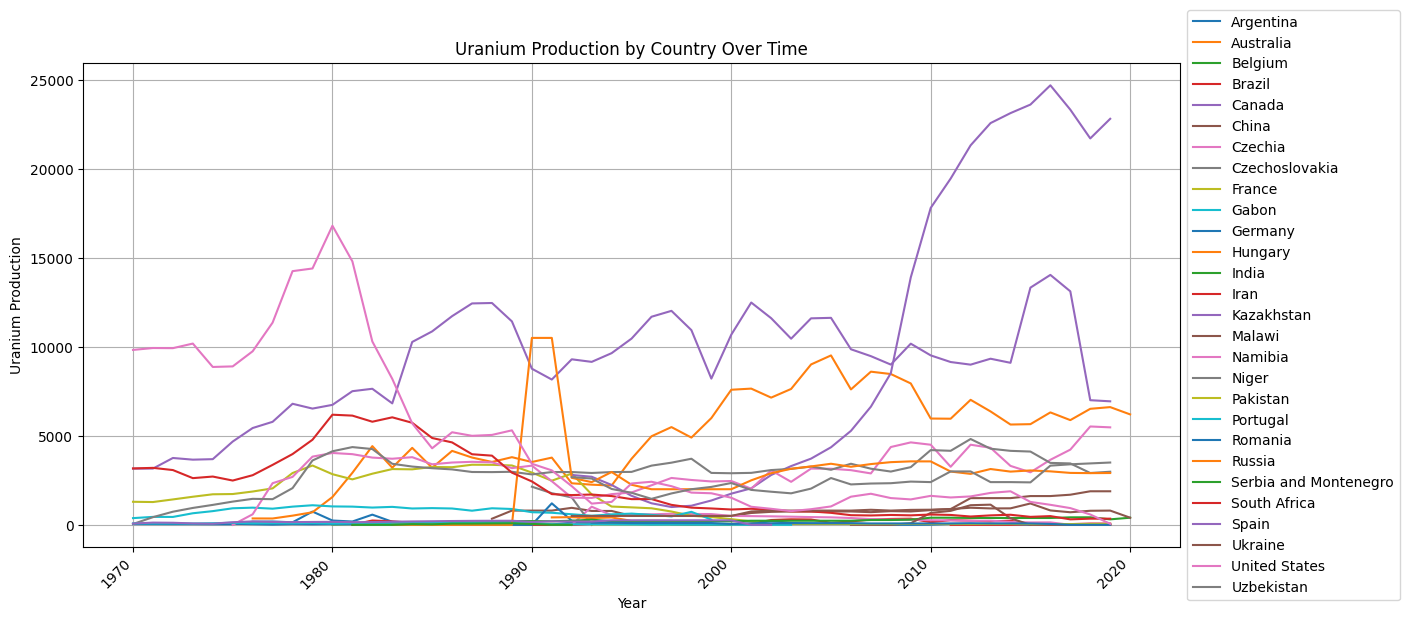

In [83]:
plt.figure(figsize=(12, 6))
for country in df_uranium['Country'].unique():
    country_data = df_uranium[df_uranium['Country'] == country]
    plt.plot(country_data['Year'], country_data['Production'], label=country)
#Création de lignes individuelle par pays
plt.xlabel("Year")
plt.ylabel("Uranium Production")
plt.title("Uranium Production by Country Over Time")
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

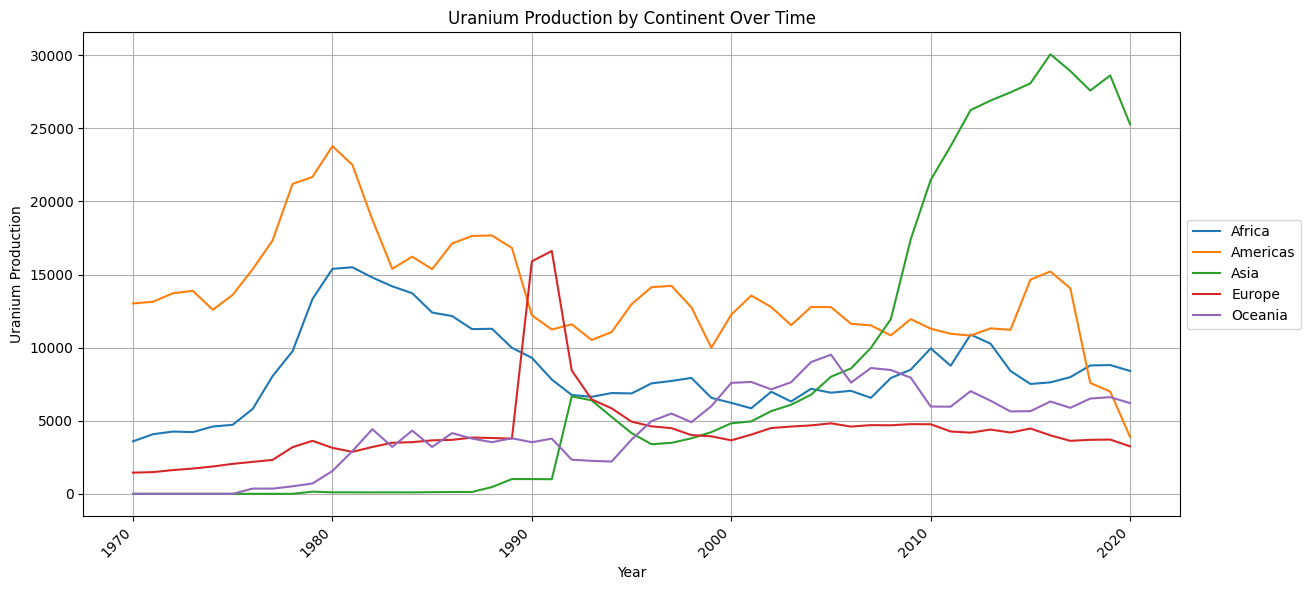

In [84]:
plt.figure(figsize=(12, 6))

for continent in df_uranium_continent['Region'].unique():
    continent_data = df_uranium_continent[df_uranium_continent['Region'] == continent]
    continent_data_transposed = continent_data.set_index('Region').T
    continent_data_transposed.index = pd.to_numeric(continent_data_transposed.index)
    continent_data_transposed.index.name = 'Year'

    sns.lineplot(data=continent_data_transposed, x=continent_data_transposed.index, y=continent, label=continent)
#Création de lignes individuelle par continent


plt.xlabel("Year")
plt.ylabel("Uranium Production")
plt.title("Uranium Production by Continent Over Time")
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

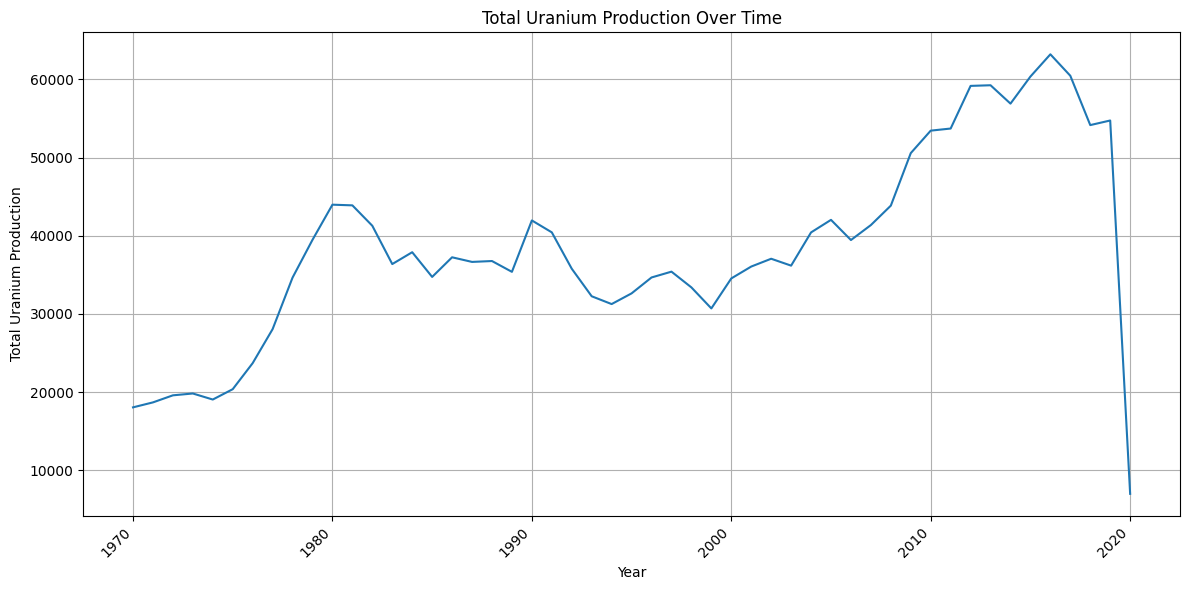

In [85]:
df_yearly_production = df_uranium.groupby('Year')['Production'].sum()
#aggregation pour avoir la production mondiale
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_production.index, df_yearly_production.values)
plt.xlabel("Year")
plt.ylabel("Total Uranium Production")
plt.title("Total Uranium Production Over Time")
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

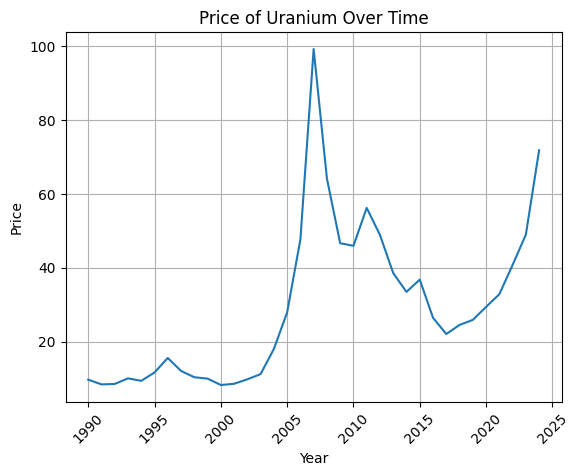

In [86]:
plt.plot(df_price['Year'], df_price['prix'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of Uranium Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

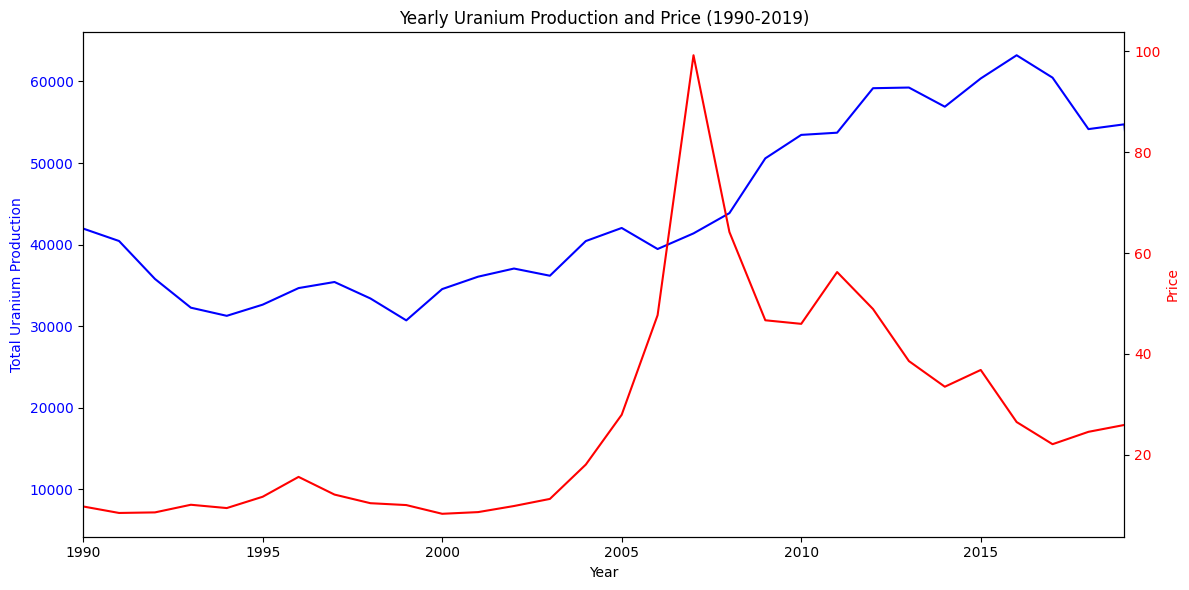

In [87]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_yearly_production.index, df_yearly_production.values, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Uranium Production', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlim(1990, 2019)
#premier axe Y pour la production
ax2 = ax1.twinx()
ax2.plot(df_price['Year'], df_price['prix'], color='red', linestyle='-', marker='')
ax2.set_ylabel('Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xlim(1990, 2019) #limitation sur les données disponibles dans les deux dataframes
#deuxième axe Y pour le prix
plt.title('Yearly Uranium Production and Price (1990-2019)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [88]:
df_price_prod = pd.merge(df_price, df_yearly_production, on='Year', how='inner')
df_price_prod.head()

,Year,prix,Production
0,1990,9.737500,41963.0
1,1991,8.450000,40439.0
2,1992,8.562500,35789.0
3,1993,10.077083,32266.0
4,1994,9.420833,31268.0


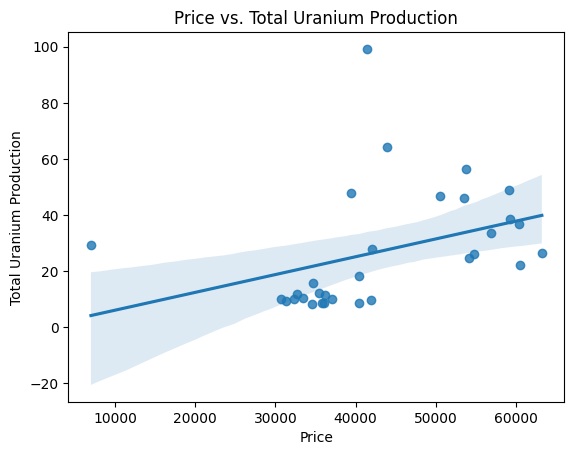

In [89]:
sns.regplot(y='prix', x='Production', data=df_price_prod)
plt.xlabel('Price')
plt.ylabel('Total Uranium Production')
plt.title('Price vs. Total Uranium Production')
plt.show()

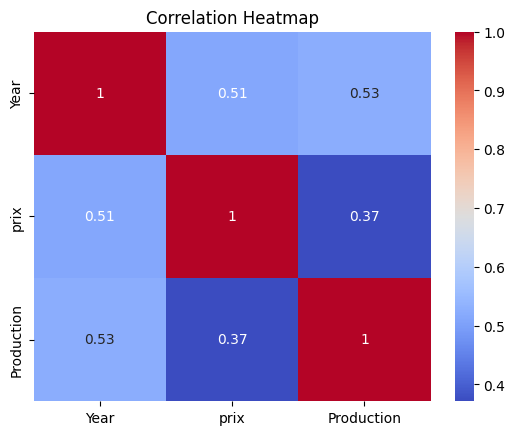

In [90]:
sns.heatmap(df_price_prod.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

EXPORT CSV URANIUM PRICE POUR VISUALISATION


---



In [91]:
from google.colab import files

# Exporter le DataFrame en CSV
df_price_prod.to_csv('price_prod_uranium.csv', index=False, encoding = 'utf-8-sig' )

# Télécharger le fichier
files.download('price_prod_uranium.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



# Production du nucléaire par pays et continents entre les années 1990 et 2023

In [92]:
# data frame de chaque pays avec la somme total des productions par pays et  les valeurs dans l'ordre décroisant

# Groupe by pays et sum avec la production de Nucléaire et ranger les valeurs par ordre DESC
total_production_par_pays = (df_wne_pays.groupby('pays')['electricite_nucleaire(twh)'].sum()).sort_values(ascending=False)

# Creation du  DataFrame avec réitialisation des index
df_production_nucleaire = pd.DataFrame({'pays': total_production_par_pays.index, 'electricite_nucleaire(twh)': total_production_par_pays.values})

df_production_nucleaire = df_production_nucleaire.round(2)

<ipython-input-93-7cada3e9748f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='electricite_nucleaire(twh)', y='pays', data=df_production_nucleaire.head(10), palette="viridis")


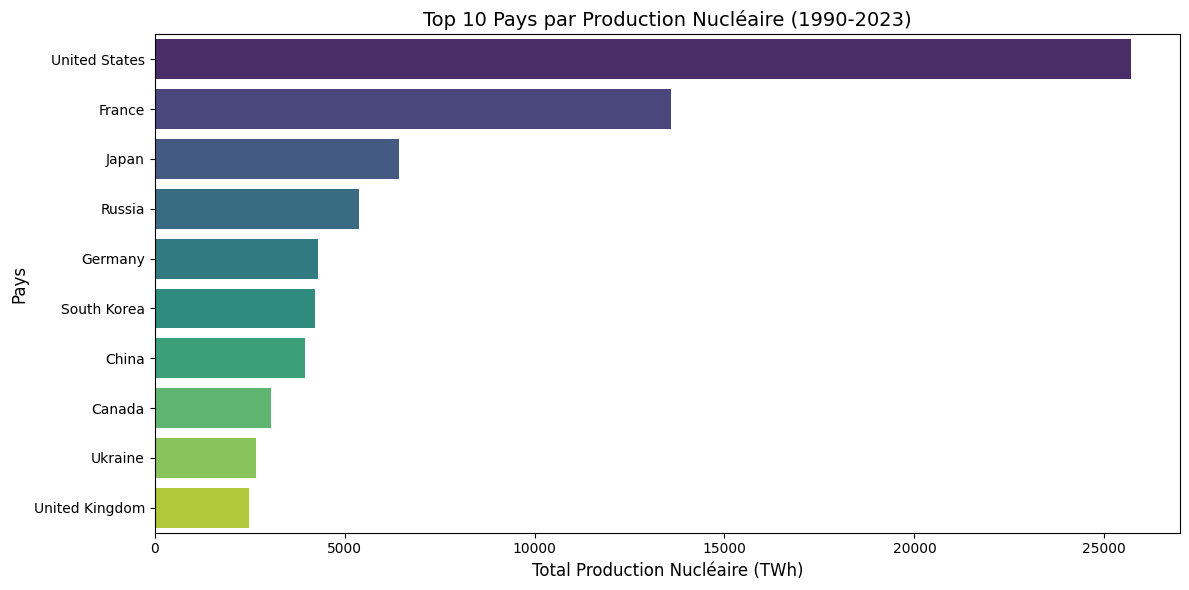

In [93]:
# création d'un barplot avec les top 10  des pays par production du nucleaire

plt.figure(figsize=(12, 6))  # ajustement des dimension du graphique
sns.barplot(x='electricite_nucleaire(twh)', y='pays', data=df_production_nucleaire.head(10), palette="viridis")
plt.xlabel('Total Production Nucléaire (TWh)', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.title('Top 10 Pays par Production Nucléaire (1990-2023)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [94]:
# Tableau de repartition des pourcentages avec les top 10  des pays par production du nucleaire

# Calculate total production
total_production = df_production_nucleaire['electricite_nucleaire(twh)'].sum()

# Calculate percentages and create a new DataFrame
df_percentage_production_nucleaire = df_production_nucleaire.head(10).copy()
df_percentage_production_nucleaire['percentage(%)'] = (df_percentage_production_nucleaire['electricite_nucleaire(twh)'] / total_production) * 100
df_percentage = df_percentage_production_nucleaire[['pays', 'percentage(%)']].sort_values('percentage(%)', ascending=False)

# Display the table
df_percentage_production_nucleaire = df_percentage_production_nucleaire.round(2)
df_percentage_production_nucleaire

,pays,electricite_nucleaire(twh),percentage(%)
0,United States,25705.64,30.09
1,France,13588.26,15.91
2,Japan,6433.93,7.53
3,Russia,5376.93,6.29
4,Germany,4292.90,5.02
5,South Korea,4209.25,4.93
6,China,3956.21,4.63
7,Canada,3060.71,3.58
8,Ukraine,2677.38,3.13
9,United Kingdom,2495.24,2.92


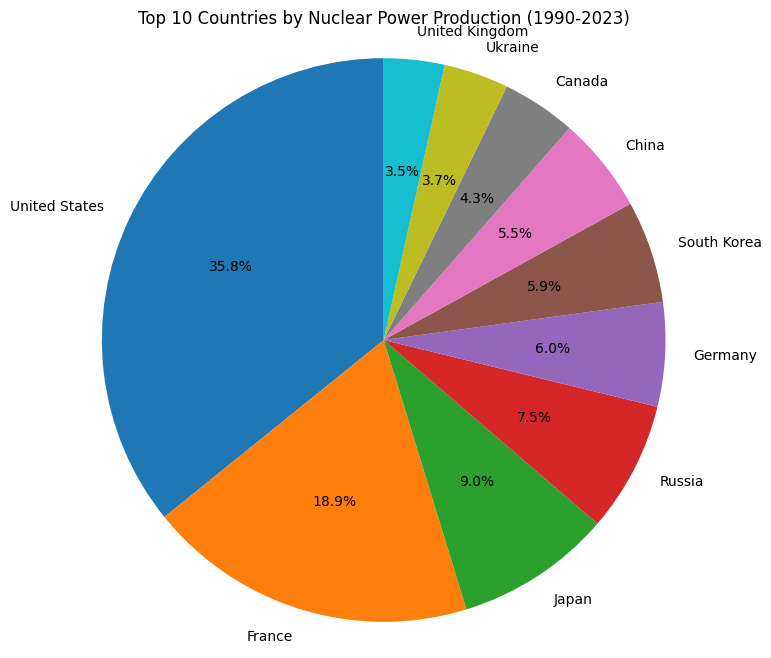

In [95]:
# pie chart de repartition des pourcentages avec le top 10 des pays
plt.figure(figsize=(8, 8))
plt.pie(df_percentage_production_nucleaire['percentage(%)'], labels=df_percentage_production_nucleaire['pays'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries by Nuclear Power Production (1990-2023)')
plt.axis('equal')
plt.show()

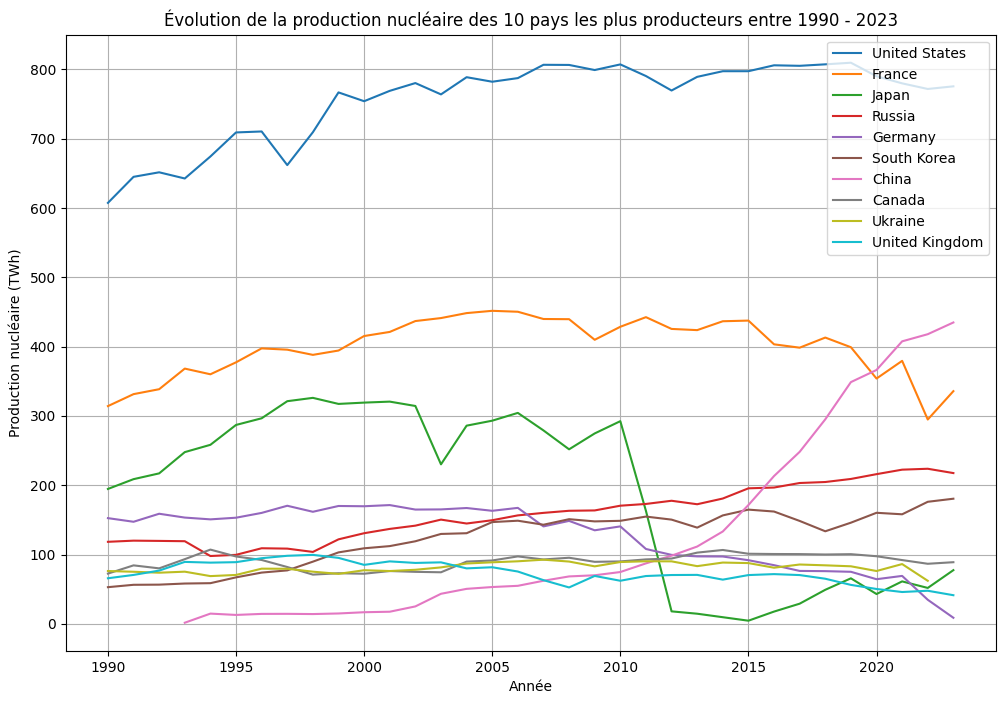

In [96]:
# Courbe des tops 10 de chaque évolution de production de nucléaire de chaque pays entre 1990 et 2023

top_10_pays = df_production_nucleaire.head(10)['pays'].tolist()

plt.figure(figsize=(12, 8))

for pays in top_10_pays:
    df_pays = df_wne_pays[df_wne_pays['pays'] == pays]
    plt.plot(df_pays['year'], df_pays['electricite_nucleaire(twh)'], label=pays)

plt.xlabel('Année')
plt.ylabel('Production nucléaire (TWh)')
plt.title('Évolution de la production nucléaire des 10 pays les plus producteurs entre 1990 - 2023')
plt.legend()
plt.grid(True)
plt.show()

**CLASSEMENT PAR CONTINENTS**


---



In [97]:
# data frame de chaque continent avec la somme total des productions du nucléaire par continent avec valeurs dans l'ordre décroisant

# Groupe par continent et sum avec la production de Nucléaire et ranger les valeurs par ordre DESC
total_production_par_continent = (df_wne_continents.groupby('pays')['electricite_nucleaire(twh)'].sum()).sort_values(ascending=False)

# Creation du DataFrame avec réinitialisation des index
df_production_nucleaire_continent = pd.DataFrame({'continent': total_production_par_continent.index, 'electricite_nucleaire(twh)': total_production_par_continent.values})

# Affichage du DataFrame
df_production_nucleaire_continent = df_production_nucleaire_continent.round(2)
df_production_nucleaire_continent

,continent,electricite_nucleaire(twh)
0,World,85929.32
1,Europe,37936.98
2,America,28790.08
3,Asia,16124.38
4,Africa,392.13


<ipython-input-98-1b74ce1f75d6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='electricite_nucleaire(twh)', data=df_production_nucleaire_continent, palette="viridis")


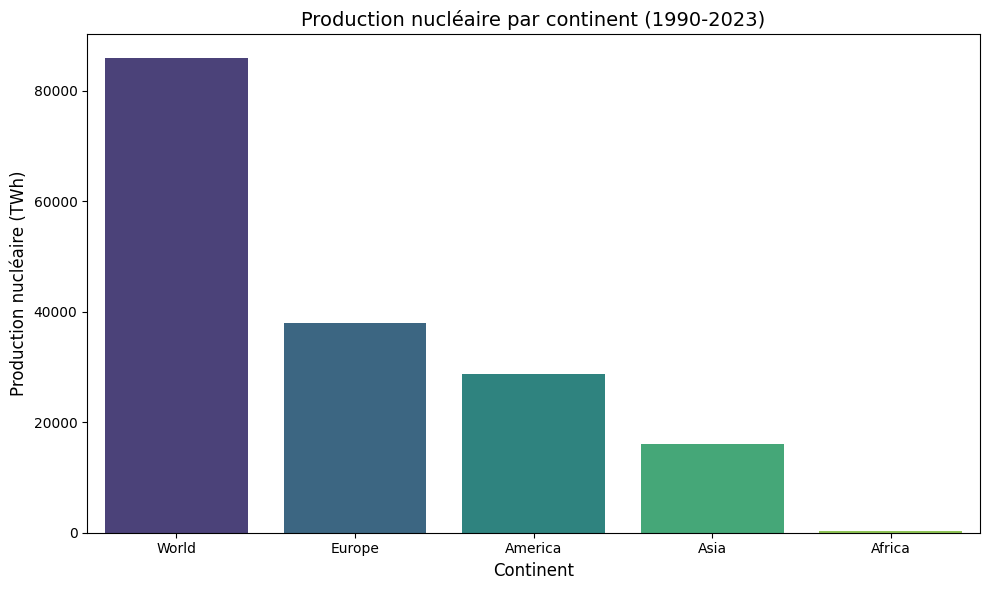

In [98]:
#  barplot du classement avec des continents  par production

# Assuming df_production_nucleaire_continent is defined as in your provided code

plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='electricite_nucleaire(twh)', data=df_production_nucleaire_continent, palette="viridis")
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Production nucléaire (TWh)', fontsize=12)
plt.title('Production nucléaire par continent (1990-2023)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

EXPORT CSV POUR VISUALISATION


---



In [99]:
# Exporter le DataFrame en CSV
df_wne_pays.to_csv('production_per_country.csv', index=False, encoding = 'utf-8-sig' )
files.download('production_per_country.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



EXPORT CSV POUR VISUALISATION


---



In [100]:
# Exporter le DataFrame en CSV
df_wne_continents.to_csv('production_per_continent.csv', index=False, encoding = 'utf-8-sig' )
files.download('production_per_continent.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



#Consommation du nucléaire par pays et continents entre les années 1990 et 2020

In [101]:
df_conso_nucleaire = df_filtered

In [102]:
# changement du nom de la colonne country en pays
df_conso_nucleaire = df_conso_nucleaire.rename(columns={'country': 'pays'})
df_conso_nucleaire

,pays,year,population,nuclear_consumption,solar_consumption,wind_consumption,hydro_consumption,coal_consumption,oil_consumption,gas_consumption
237,Africa,1990,638157571,23.974,0.0,0.000,169.301,877.678,1135.959,398.645
238,Africa,1991,655040869,25.946,0.0,0.000,179.346,853.762,1141.910,401.636
239,Africa,1992,671931834,26.355,0.0,0.000,171.092,858.831,1164.203,421.270
240,Africa,1993,689140286,20.586,0.0,0.006,167.610,871.714,1176.172,412.644
241,Africa,1994,706488557,27.515,0.0,0.016,170.311,894.448,1214.283,431.828
...,...,...,...,...,...,...,...,...,...,...
21804,Zimbabwe,2016,14452705,0.000,NaN,NaN,NaN,NaN,NaN,NaN
21805,Zimbabwe,2017,14751101,0.000,NaN,NaN,NaN,NaN,NaN,NaN
21806,Zimbabwe,2018,15052191,0.000,NaN,NaN,NaN,NaN,NaN,NaN
21807,Zimbabwe,2019,15354606,0.000,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df_conso_nucleaire['nuclear_consumption'].isna().sum()

0

In [104]:
# deplacement de la colonne 'population' à et remettre à en dernier colonne
cols = list(df_conso_nucleaire.columns)
cols.remove('population')
cols.append('population')
df_conso_nucleaire = df_conso_nucleaire[cols]
# df_conso_nucleaire

In [105]:
df_conso_nucleaire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3534 entries, 237 to 21808
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pays                 3534 non-null   object 
 1   year                 3534 non-null   int32  
 2   nuclear_consumption  3534 non-null   float64
 3   solar_consumption    2742 non-null   float64
 4   wind_consumption     2759 non-null   float64
 5   hydro_consumption    2585 non-null   float64
 6   coal_consumption     2661 non-null   float64
 7   oil_consumption      2759 non-null   float64
 8   gas_consumption      2646 non-null   float64
 9   population           3534 non-null   int64  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 289.9+ KB


DATAFRAME PAR PAYS

In [106]:
valeurs_a_exclure = [
    'Africa', 'Asia', 'Europe', 'European Union (27)', 'High-income countries',
    'Hong Kong', 'North America', 'Oceania', 'Netherlands Antilles', 'New Caledonia', 'South America',
    'World','America', 'Upper-middle-income countries', 'Lower-middle-income countries'
]
#Dataframe consommation par Pays
df_conso_wne_pays = df_conso_nucleaire[~df_conso_nucleaire['pays'].isin(valeurs_a_exclure)]

# affiche le data frame
df_conso_wne_pays

,pays,year,nuclear_consumption,solar_consumption,wind_consumption,hydro_consumption,coal_consumption,oil_consumption,gas_consumption,population
726,Algeria,1990,0.0,0.0,0.0,0.399,7.664,111.812,195.099,25518074
727,Algeria,1991,0.0,0.0,0.0,0.866,7.908,110.628,192.692,26133906
728,Algeria,1992,0.0,0.0,0.0,0.588,9.397,111.293,198.949,26748302
729,Algeria,1993,0.0,0.0,0.0,1.044,7.653,110.755,178.544,27354326
730,Algeria,1994,0.0,0.0,0.0,0.491,7.211,106.051,188.169,27937006
...,...,...,...,...,...,...,...,...,...,...
21804,Zimbabwe,2016,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14452705
21805,Zimbabwe,2017,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14751101
21806,Zimbabwe,2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15052191
21807,Zimbabwe,2019,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15354606


DATAFRAME CONSOMMATION PAR CONTINENT

In [107]:
# Remplacer 'South America' et 'North America' par 'America'
df_conso_nucleaire['pays'] = df_conso_nucleaire['pays'].replace(
    {'South America': 'America', 'North America': 'America'}
)

valeurs_a_garder = ['Europe', 'Asia', 'Africa','America','World', 'Oceania']
# Dataframe avec seulement les continents
df_conso_wne_continents = df_conso_nucleaire[df_conso_nucleaire['pays'].isin(valeurs_a_garder)]
#
df_conso_wne_continents

,pays,year,nuclear_consumption,solar_consumption,wind_consumption,hydro_consumption,coal_consumption,oil_consumption,gas_consumption,population
237,Africa,1990,23.974,0.000,0.000,169.301,877.678,1135.959,398.645,638157571
238,Africa,1991,25.946,0.000,0.000,179.346,853.762,1141.910,401.636,655040869
239,Africa,1992,26.355,0.000,0.000,171.092,858.831,1164.203,421.270,671931834
240,Africa,1993,20.586,0.000,0.006,167.610,871.714,1176.172,412.644,689140286
241,Africa,1994,27.515,0.000,0.016,170.311,894.448,1214.283,431.828,706488557
...,...,...,...,...,...,...,...,...,...,...
21420,World,2016,6714.155,879.125,2575.674,10749.688,42736.863,52060.852,35229.348,7513474048
21421,World,2017,6734.279,1185.098,3038.975,10826.592,43193.281,52978.801,36517.570,7599822336
21422,World,2018,6855.408,1520.514,3361.329,11080.882,43852.793,53521.387,38321.438,7683789824
21423,World,2019,7071.782,1859.597,3746.709,11184.757,43597.164,53618.926,39084.453,7764951040


Apperçu du classement des consommations global des pays (top 10)

In [108]:
# data frame de chaque pays avec la somme total des productions par pays et  les valeurs dans l'ordre décroisant

total_consommation_par_pays = (df_conso_wne_pays.groupby('pays')['nuclear_consumption'].sum()).sort_values(ascending=False)

# Creation du  DataFrame avec réitialisation des index
df_consommation_nucleaire = pd.DataFrame({'pays': total_consommation_par_pays.index, 'consommation_nucleaire': total_consommation_par_pays.values})

# Affichage du DataFrame
df_consommation_nucleaire

,pays,consommation_nucleaire
0,United States,65830.578
1,France,34206.335
2,Japan,17341.508
3,Russia,12714.577
4,Germany,11505.944
...,...,...
100,Indonesia,0.000
101,Iceland,0.000
102,Guyana,0.000
103,Greece,0.000


<ipython-input-109-34afffa4eed9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='consommation_nucleaire', y='pays', data=df_consommation_nucleaire.head(10), palette="plasma")


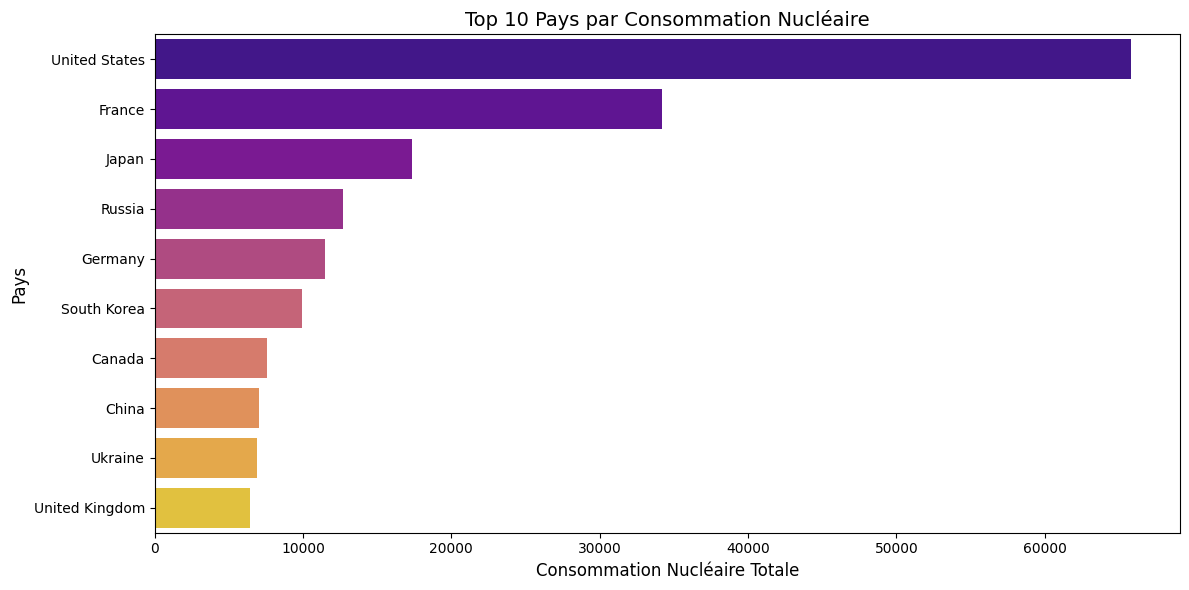

In [109]:
# création d'un barplot avec le top 10  des pays par consommation du nucleaire
plt.figure(figsize=(12, 6))
sns.barplot(x='consommation_nucleaire', y='pays', data=df_consommation_nucleaire.head(10), palette="plasma")
plt.xlabel('Consommation Nucléaire Totale', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.title('Top 10 Pays par Consommation Nucléaire', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [110]:
# Calcul de la consomation total
total_consumption = df_consommation_nucleaire['consommation_nucleaire'].sum()

# Calcul du pourcentage et création de son data frame
df_percentage_consommation_nucleaire = df_consommation_nucleaire.head(10).copy()
df_percentage_consommation_nucleaire['percentage(%)'] = (df_percentage_consommation_nucleaire['consommation_nucleaire'] / total_consumption) * 100
df_percentage_consommation = df_percentage_consommation_nucleaire[['pays', 'percentage(%)']].sort_values('percentage(%)', ascending=False)

# Display the table
df_percentage_consommation

,pays,percentage(%)
0,United States,30.801331
1,France,16.004730
2,Japan,8.113882
3,Russia,5.948997
4,Germany,5.383492
5,South Korea,4.656416
6,Canada,3.546306
7,China,3.282228
8,Ukraine,3.215557
9,United Kingdom,3.023181


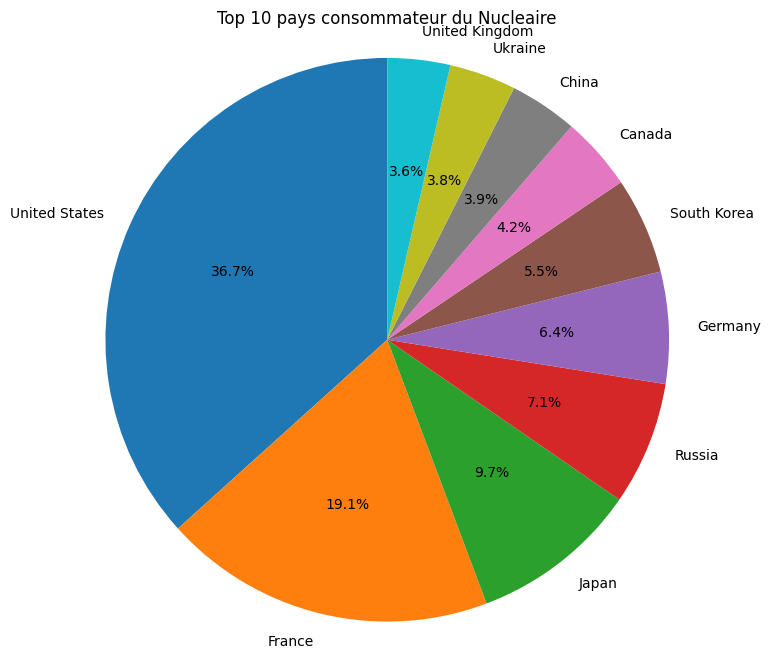

In [111]:
# pie chart de repartition des pourcentages avec le top 10 des pays
plt.figure(figsize=(8, 8))
plt.pie(df_percentage_consommation_nucleaire['percentage(%)'], labels=df_percentage_consommation_nucleaire['pays'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 pays consommateur du Nucleaire')
plt.axis('equal')
plt.show()

Evolution de consommation nucléaire par pays de 1990 à 2020

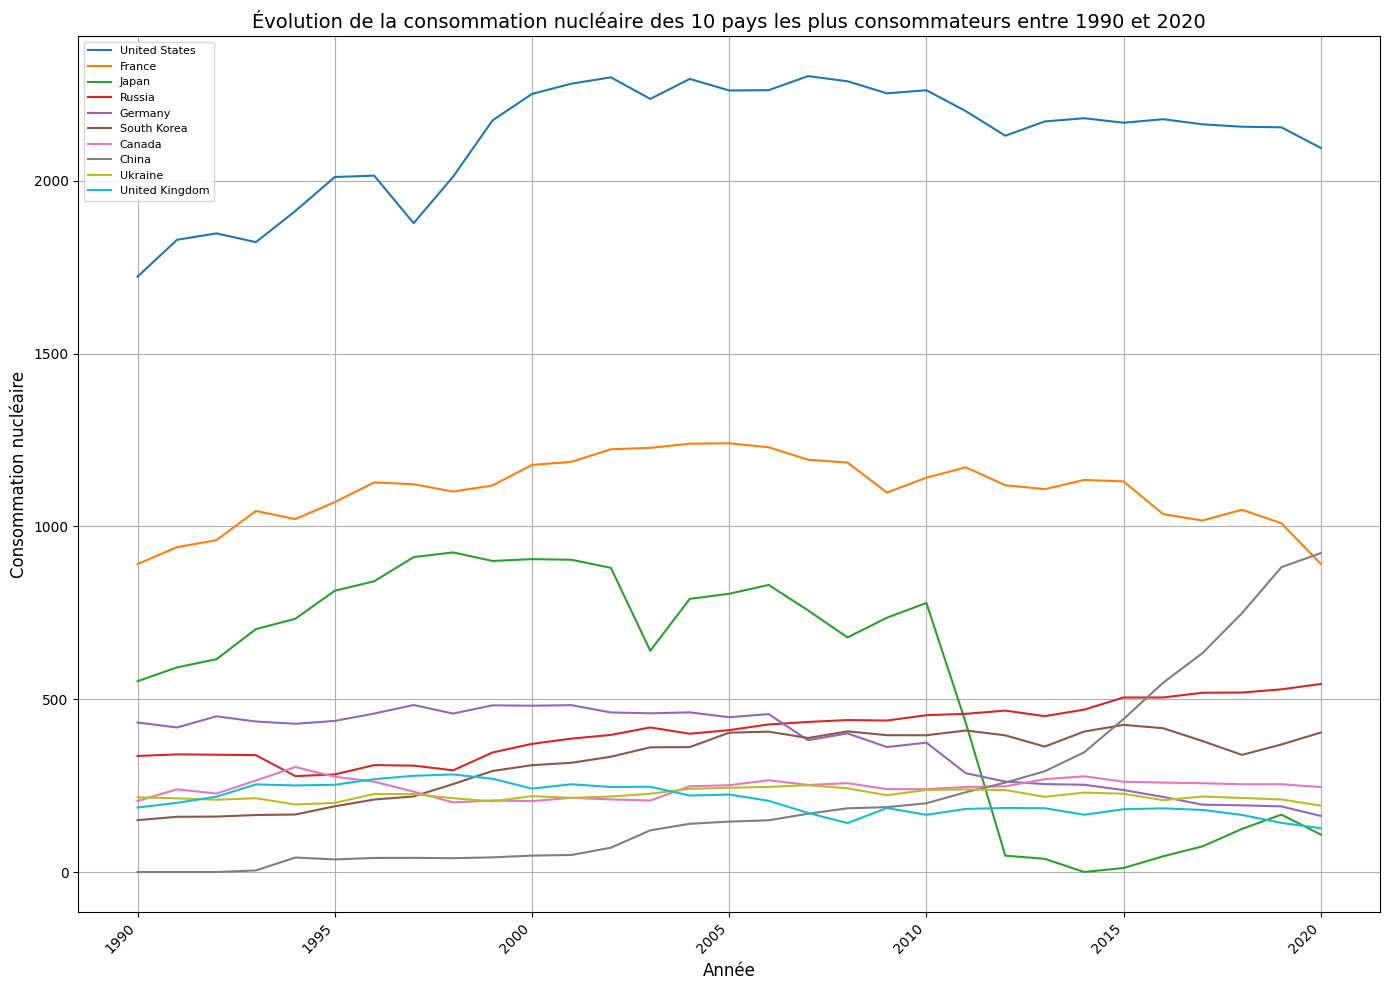

In [112]:
# Courbe des tops 10 de chaque évolution de consommation du nucléaire de chaque pays entre 1990 et 2023

top_10_pays_consommation = df_consommation_nucleaire.head(10)['pays'].tolist()

plt.figure(figsize=(14, 10))

for pays in top_10_pays_consommation:
    df_pays = df_conso_wne_pays[df_conso_wne_pays['pays'] == pays]
    plt.plot(df_pays['year'], df_pays['nuclear_consumption'], label=pays)

plt.xlabel('Année', fontsize=12)
plt.ylabel('Consommation nucléaire', fontsize=12)
plt.title('Évolution de la consommation nucléaire des 10 pays les plus consommateurs entre 1990 et 2020', fontsize=14)
plt.legend(fontsize=8) # Lengende
plt.grid(True)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Classement continent

In [113]:
# data frame de chaque continent avec la somme total des consommations du nucléaire par continent avec valeurs dans l'ordre décroisant

total_consommation_par_continent = (df_conso_wne_continents.groupby('pays')['nuclear_consumption'].sum()).sort_values(ascending=False)

# Creation du  DataFrame avec réitialisation des index
df_consommation_nucleaire_continent = pd.DataFrame({'continent': total_consommation_par_continent.index, 'consommation_nucleaire': total_consommation_par_continent.values})

# Affichage du DataFrame
df_consommation_nucleaire_continent

,continent,consommation_nucleaire
0,World,213882.923
1,Europe,97580.000
2,America,75615.472
3,Asia,39683.876
4,Africa,1003.569
5,Oceania,0.000


<ipython-input-114-915b48cde8f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='consommation_nucleaire', data=df_consommation_nucleaire_continent, palette="plasma")


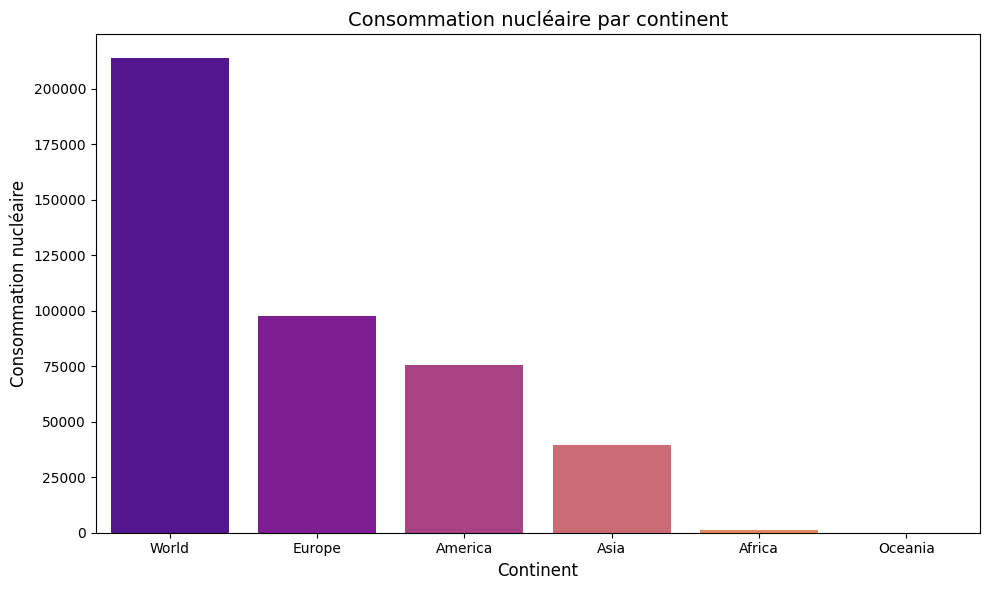

In [114]:
# représentation graphique df_consommation_nucleaire_continent
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='consommation_nucleaire', data=df_consommation_nucleaire_continent, palette="plasma")
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Consommation nucléaire', fontsize=12)
plt.title('Consommation nucléaire par continent', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Corélation entre df_production_nucleaire et df_consommation_nucleaire

In [115]:
# corélation entre df_production_nucleaire et df_consommation_nucleaire

# merge entre les deux tables
df_merge_prod_conso = pd.merge(df_production_nucleaire, df_consommation_nucleaire, on='pays', how='inner')

# Calcul de la correlation entre 'electricite_nucleaire(twh)' and 'consommation_nucleaire'.
correlation = df_merge_prod_conso['electricite_nucleaire(twh)'].corr(df_merge_prod_conso['consommation_nucleaire'])

print(f"La corrélation entre la production et la consommation nucléaire est : {correlation}")

La corrélation entre la production et la consommation nucléaire est : 0.9988273194006562


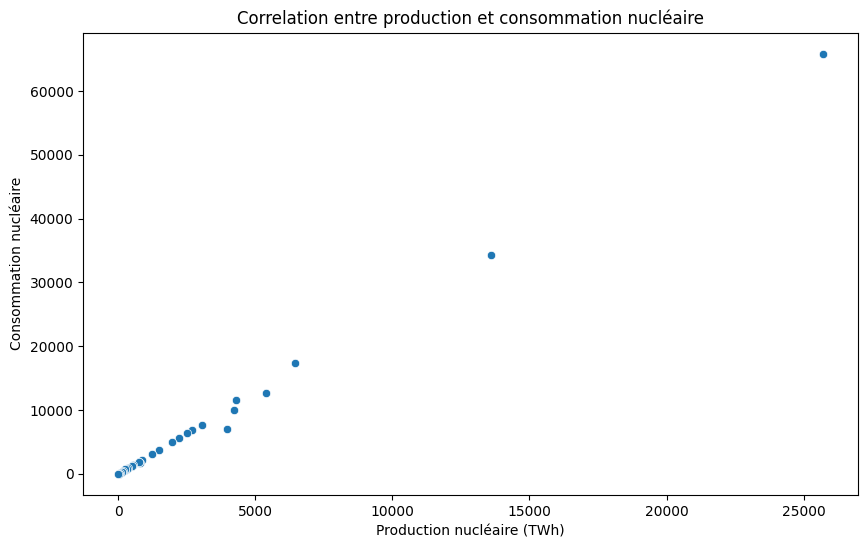

In [116]:
#  nuage de points pour visualiser la relation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='electricite_nucleaire(twh)', y='consommation_nucleaire', data=df_merge_prod_conso)
plt.xlabel('Production nucléaire (TWh)')
plt.ylabel('Consommation nucléaire')
plt.title('Correlation entre production et consommation nucléaire')
plt.show()

# Production hors nucléaire par pays et continents entre les années 1990 et 2023

In [117]:
df_wne_pays

,year,pays,electricite_nucleaire(twh),part_nucleaire(%),production_hors_nucleaire(twh),total_production(twh)
90,1990,Argentina,7.281,14.275102,43.723889,51.004889
91,1991,Argentina,7.756,14.401829,46.098271,53.854271
92,1992,Argentina,7.081,12.620506,49.026101,56.107101
93,1993,Argentina,7.750,12.526512,54.118779,61.868779
94,1994,Argentina,8.235,12.549138,57.387037,65.622037
...,...,...,...,...,...,...
1785,2019,United States,809.410,19.464552,3348.969808,4158.379808
1786,2020,United States,789.880,19.536108,3253.299941,4043.179941
1787,2021,United States,779.650,18.770372,3373.970397,4153.620397
1788,2022,United States,771.540,17.997578,3515.370161,4286.910161


In [118]:
# data frame de chaque pays avec la somme total des productions hors nucléaire par pays et  les valeurs dans l'ordre décroisant

# Groupe by pays et sum avec la production de Nucléaire et ranger les valeurs par ordre DESC
total_production_hors_nucleaire_pays = (df_wne_pays.groupby('pays')['production_hors_nucleaire(twh)'].sum()).sort_values(ascending=False)

# Creation du  DataFrame avec réitialisation des index
df_production_hors_nucleaire = pd.DataFrame({'pays': total_production_hors_nucleaire_pays.index, 'production_hors_nucleaire(twh)': total_production_par_pays.values})

# affichage du DataFrame
df_production_hors_nucleaire

,pays,production_hors_nucleaire(twh)
0,China,25705.639700
1,United States,13588.260000
2,India,6433.933010
3,Russia,5376.929810
4,Japan,4292.900000
5,Canada,4209.248034
6,Germany,3956.208000
7,Brazil,3060.713155
8,United Kingdom,2677.380000
9,South Korea,2495.240000


<ipython-input-119-91d7cf829a69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='production_hors_nucleaire(twh)', y='pays', data=df_production_hors_nucleaire.head(10), palette="viridis")


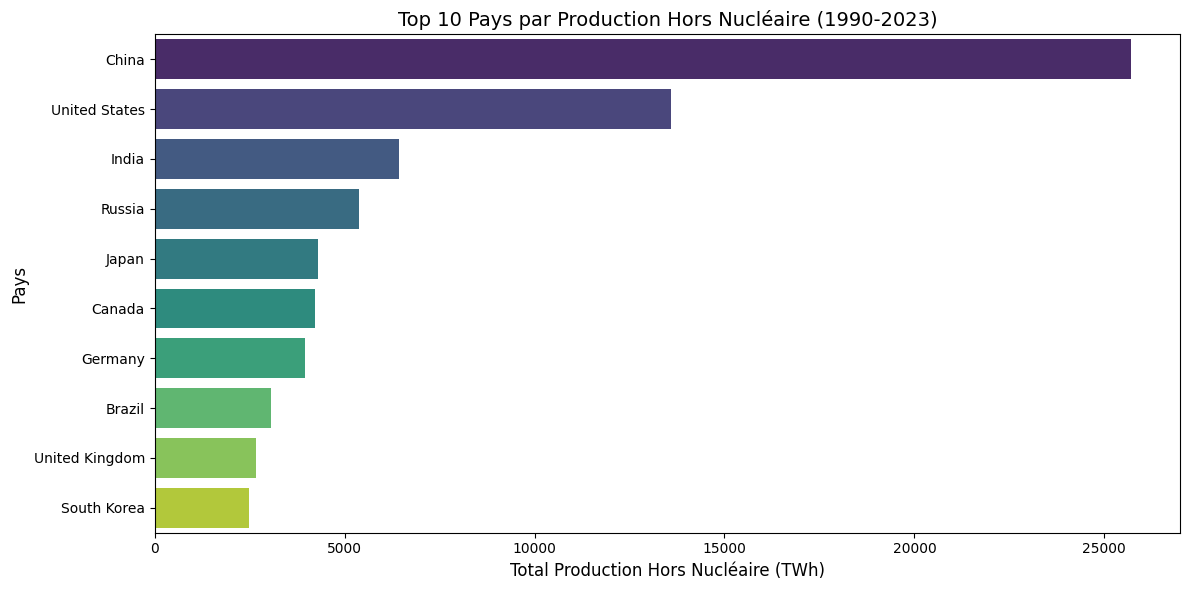

In [119]:
# représentation graphique du top 10 de df_production_hors_nucleaire
plt.figure(figsize=(12, 6))
sns.barplot(x='production_hors_nucleaire(twh)', y='pays', data=df_production_hors_nucleaire.head(10), palette="viridis")
plt.xlabel('Total Production Hors Nucléaire (TWh)', fontsize=12)
plt.ylabel('Pays', fontsize=12)
plt.title('Top 10 Pays par Production Hors Nucléaire (1990-2023)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [120]:
# Tableau de repartition des pourcentages avec les top 10  des pays par production du nucleaire

# Calculate total production
total_production_hors_nucléaire = df_production_hors_nucleaire['production_hors_nucleaire(twh)'].sum()

# Calculate percentages and create a new DataFrame
df_percentage_production_hors_nucleaire = df_production_hors_nucleaire.head(10).copy()
df_percentage_production_hors_nucleaire['percentage(%)'] = (df_percentage_production_hors_nucleaire['production_hors_nucleaire(twh)'] / total_production_hors_nucléaire) * 100
df_percentage = df_percentage_production_hors_nucleaire[['pays', 'percentage(%)']].sort_values('percentage(%)', ascending=False)

# Display the table
df_percentage_production_hors_nucleaire

,pays,production_hors_nucleaire(twh),percentage(%)
0,China,25705.639700,30.089201
1,United States,13588.260000,15.905454
2,India,6433.933010,7.531106
3,Russia,5376.929810,6.293853
4,Japan,4292.900000,5.024965
5,Canada,4209.248034,4.927048
6,Germany,3956.208000,4.630857
7,Brazil,3060.713155,3.582654
8,United Kingdom,2677.380000,3.133951
9,South Korea,2495.240000,2.920751


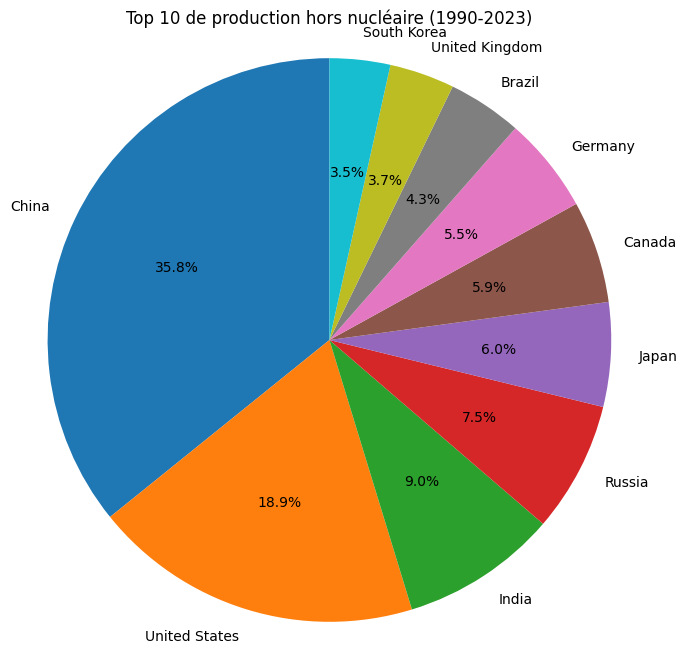

In [121]:
# pie chart de repartition des pourcentages avec le top 10 des pays
plt.figure(figsize=(8, 8))
plt.pie(df_percentage_production_hors_nucleaire['percentage(%)'], labels=df_percentage_production_hors_nucleaire['pays'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 de production hors nucléaire (1990-2023)')
plt.axis('equal')
plt.show()

In [122]:
# data frame de chaque continent avec la somme total des productions hors nucléaire par pays et  les valeurs dans l'ordre décroisant

# production hors nucleaire grouper par continent
total_production_hors_nucleaire_continent = (df_wne_continents.groupby('pays')['production_hors_nucleaire(twh)'].sum()).sort_values(ascending=False)

# Creation de data frame
df_production_hors_nucleaire_continent = pd.DataFrame({
    'continent': total_production_hors_nucleaire_continent.index,
    'production_hors_nucleaire(twh)': total_production_hors_nucleaire_continent.values
})

# Display the DataFrame
df_production_hors_nucleaire_continent

,continent,production_hors_nucleaire(twh)
0,World,577477.494159
1,Asia,250034.173415
2,America,159559.115180
3,Europe,112822.570962
4,Africa,19046.158951


<ipython-input-123-097550513d55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='production_hors_nucleaire(twh)', data=df_production_hors_nucleaire_continent, palette="plasma")


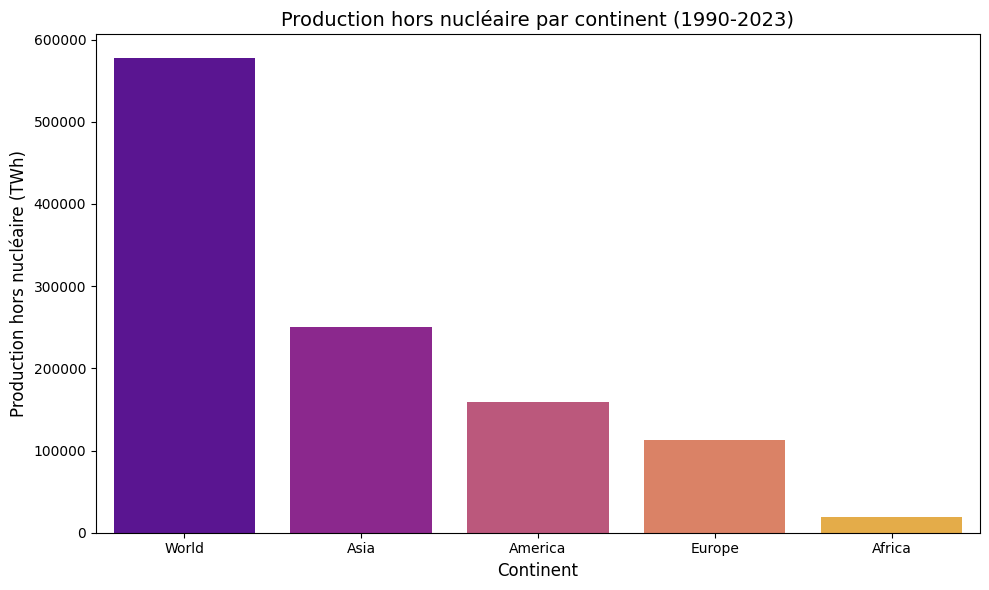

In [123]:
# représentation graphique de df_production_hors_nucleaire_continent
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='production_hors_nucleaire(twh)', data=df_production_hors_nucleaire_continent, palette="plasma")
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Production hors nucléaire (TWh)', fontsize=12)
plt.title('Production hors nucléaire par continent (1990-2023)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [124]:
df_conso_nucleaire

,pays,year,nuclear_consumption,solar_consumption,wind_consumption,hydro_consumption,coal_consumption,oil_consumption,gas_consumption,population
237,Africa,1990,23.974,0.0,0.000,169.301,877.678,1135.959,398.645,638157571
238,Africa,1991,25.946,0.0,0.000,179.346,853.762,1141.910,401.636,655040869
239,Africa,1992,26.355,0.0,0.000,171.092,858.831,1164.203,421.270,671931834
240,Africa,1993,20.586,0.0,0.006,167.610,871.714,1176.172,412.644,689140286
241,Africa,1994,27.515,0.0,0.016,170.311,894.448,1214.283,431.828,706488557
...,...,...,...,...,...,...,...,...,...,...
21804,Zimbabwe,2016,0.000,NaN,NaN,NaN,NaN,NaN,NaN,14452705
21805,Zimbabwe,2017,0.000,NaN,NaN,NaN,NaN,NaN,NaN,14751101
21806,Zimbabwe,2018,0.000,NaN,NaN,NaN,NaN,NaN,NaN,15052191
21807,Zimbabwe,2019,0.000,NaN,NaN,NaN,NaN,NaN,NaN,15354606


In [125]:
# data frame de chaque pays avec la somme et  pourcentage des coal_consumption,  des oil_consumption et  des gas_consumption  par pays et  les valeurs dans l'ordre décroisant

# grouper par pays et avoir la somme de chaque type de fossil (on sort les valeur par ordre décroissant)
total_conso_fossil_pays = df_conso_wne_pays.groupby('pays').agg({
    'coal_consumption': 'sum',
    'oil_consumption': 'sum',
    'gas_consumption': 'sum'
}).sort_values(by=['coal_consumption', 'oil_consumption', 'gas_consumption'], ascending=False)

# Reset index
total_conso_fossil_pays = total_conso_fossil_pays.reset_index()

# Calcul du total consommation de chaque type de fossil
total_coal = total_conso_fossil_pays['coal_consumption'].sum()
total_oil = total_conso_fossil_pays['oil_consumption'].sum()
total_gas = total_conso_fossil_pays['gas_consumption'].sum()

# Calcul des percentages consommation de chaque type de fossil dans chaque pays
total_conso_fossil_pays['coal_percentage'] = (total_conso_fossil_pays['coal_consumption'] / total_coal) * 100
total_conso_fossil_pays['oil_percentage'] = (total_conso_fossil_pays['oil_consumption'] / total_oil) * 100
total_conso_fossil_pays['gas_percentage'] = (total_conso_fossil_pays['gas_consumption'] / total_gas) * 100

# Display the DataFrame
total_conso_fossil_pays

,pays,coal_consumption,oil_consumption,gas_consumption,coal_percentage,oil_percentage,gas_percentage
0,China,458878.192,127080.646,30133.984,43.004558,9.493534,3.550597
1,United States,165761.203,312339.044,200231.075,15.534596,23.333225,23.592629
2,India,87589.208,49214.489,11132.117,8.208573,3.676558,1.311664
3,Russia,38280.479,55862.555,125420.818,3.587521,4.173201,14.777960
4,Japan,37191.781,86689.180,27236.531,3.485492,6.476098,3.209199
...,...,...,...,...,...,...,...
100,Syria,0.000,0.000,0.000,0.000000,0.000000,0.000000
101,Tunisia,0.000,0.000,0.000,0.000000,0.000000,0.000000
102,Yemen,0.000,0.000,0.000,0.000000,0.000000,0.000000
103,Zambia,0.000,0.000,0.000,0.000000,0.000000,0.000000


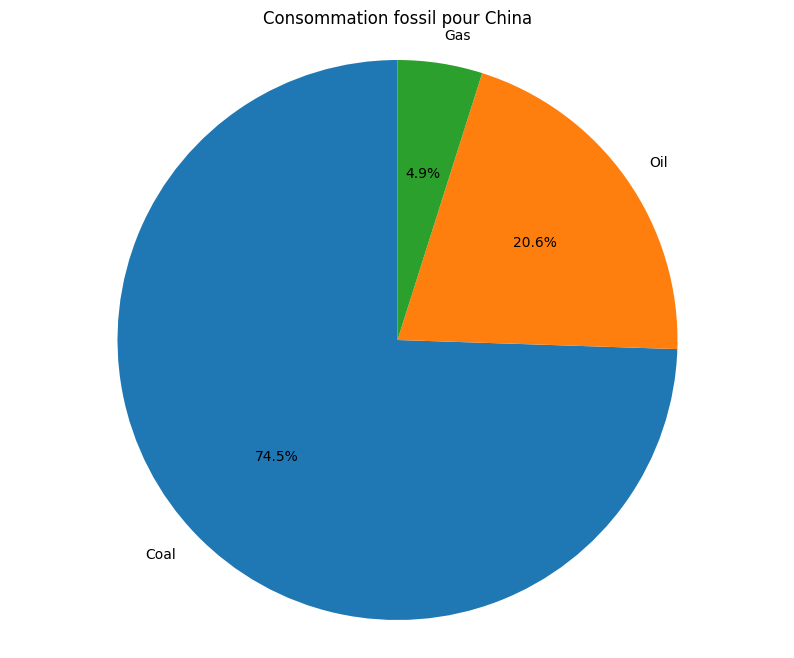

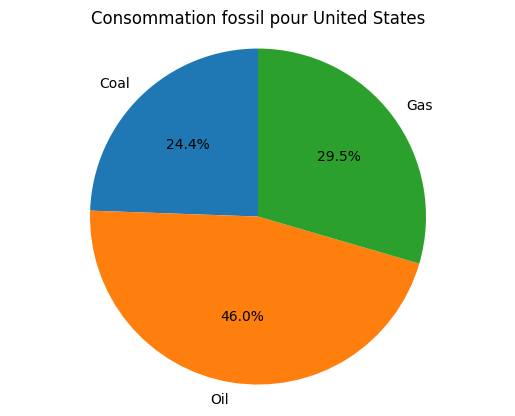

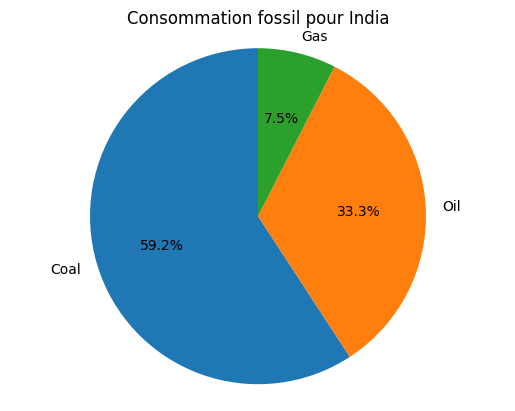

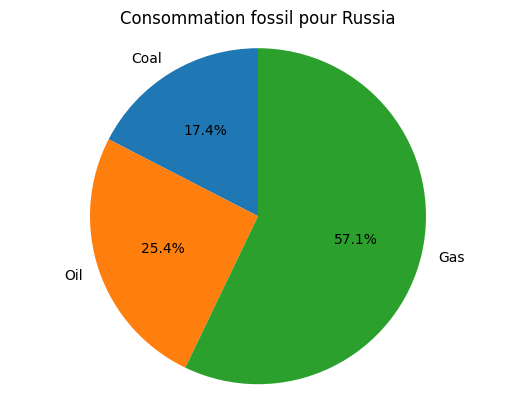

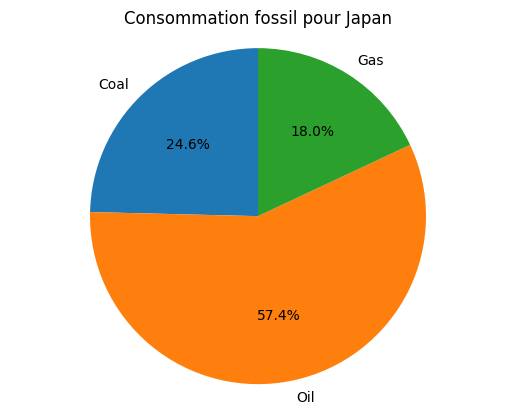

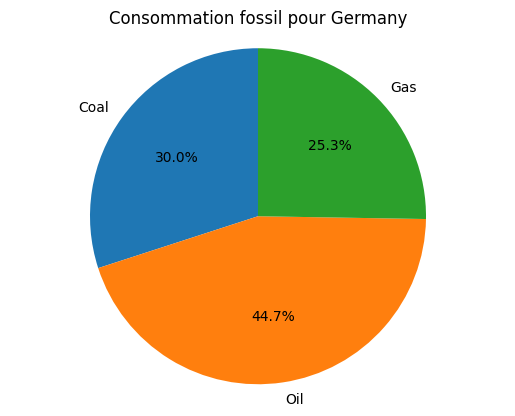

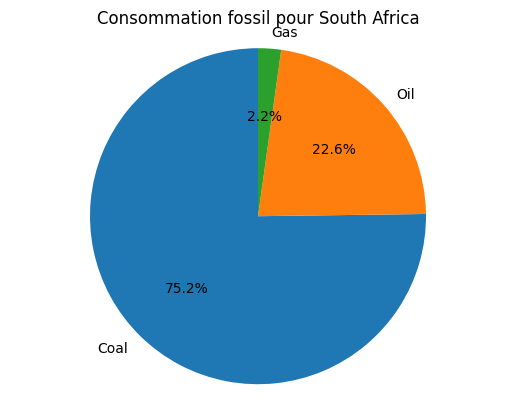

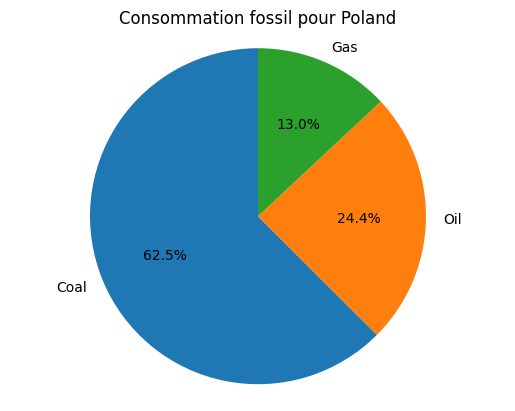

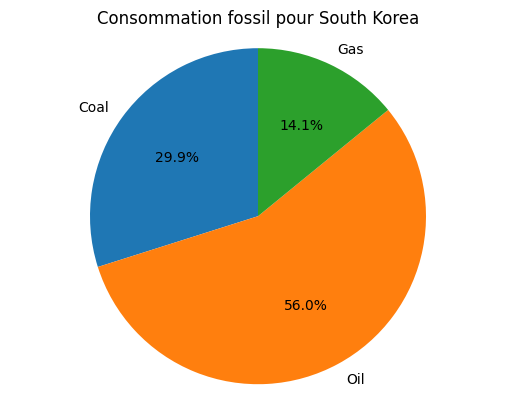

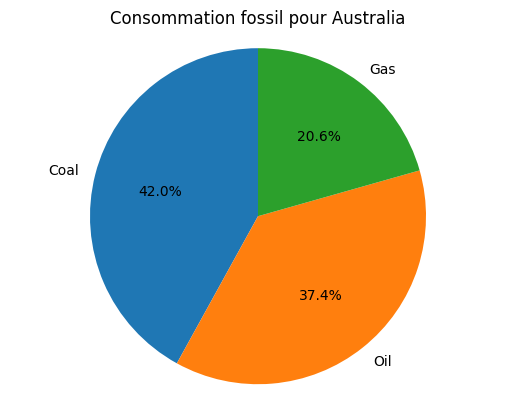

In [126]:
# pie char  du top 10 de total_conso_fossil_pays pour chaque pays

# Selection du top 10 des pays
top_10_pays = total_conso_fossil_pays.head(10)

# Create the pie chart
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability

# itérarion pour chaque pays dans le top 10
for i in range(len(top_10_pays)):
    Pays = top_10_pays.iloc[i]
    labels = ['Coal', 'Oil', 'Gas']
    sizes = [Pays['coal_consumption'], Pays['oil_consumption'], Pays['gas_consumption']]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Consommation fossil pour {Pays["pays"]}')
    plt.axis('equal')
    plt.show()

In [127]:
df_conso_wne_pays

,pays,year,nuclear_consumption,solar_consumption,wind_consumption,hydro_consumption,coal_consumption,oil_consumption,gas_consumption,population
726,Algeria,1990,0.0,0.0,0.0,0.399,7.664,111.812,195.099,25518074
727,Algeria,1991,0.0,0.0,0.0,0.866,7.908,110.628,192.692,26133906
728,Algeria,1992,0.0,0.0,0.0,0.588,9.397,111.293,198.949,26748302
729,Algeria,1993,0.0,0.0,0.0,1.044,7.653,110.755,178.544,27354326
730,Algeria,1994,0.0,0.0,0.0,0.491,7.211,106.051,188.169,27937006
...,...,...,...,...,...,...,...,...,...,...
21804,Zimbabwe,2016,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14452705
21805,Zimbabwe,2017,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14751101
21806,Zimbabwe,2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15052191
21807,Zimbabwe,2019,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15354606


In [128]:
# fossile par rapport au nucléaire

# data frame de chaque pays avec la somme et  pourcentage des nuclear_consumption, coal_consumption,  des oil_consumption et  des gas_consumption  par pays et  les valeurs dans l'ordre décroisant

# grouper par pays et avoir la somme de chaque type de fossil (on sort les valeur par ordre décroissant)
total_conso_fossil_nuclear_pays = df_conso_wne_pays.groupby('pays').agg({
    'coal_consumption': 'sum',
    'oil_consumption': 'sum',
    'gas_consumption': 'sum',
    'nuclear_consumption': 'sum'
}).sort_values(by=['coal_consumption', 'oil_consumption', 'gas_consumption', 'nuclear_consumption'], ascending=False)

# Reset index
total_conso_fossil_nuclear_pays = total_conso_fossil_nuclear_pays.reset_index()

# Calcul du total consommation de chaque type de fossil
total_coal = total_conso_fossil_nuclear_pays['coal_consumption'].sum()
total_oil = total_conso_fossil_nuclear_pays['oil_consumption'].sum()
total_gas = total_conso_fossil_nuclear_pays['gas_consumption'].sum()
total_nuclear = total_conso_fossil_nuclear_pays['nuclear_consumption'].sum()

# Calcul des percentages consommation de chaque type de fossil dans chaque pays
total_conso_fossil_nuclear_pays['coal_percentage'] = (total_conso_fossil_nuclear_pays['coal_consumption'] / total_coal) * 100
total_conso_fossil_nuclear_pays['oil_percentage'] = (total_conso_fossil_nuclear_pays['oil_consumption'] / total_oil) * 100
total_conso_fossil_nuclear_pays['gas_percentage'] = (total_conso_fossil_nuclear_pays['gas_consumption'] / total_gas) * 100
total_conso_fossil_nuclear_pays['nuclear_percentage'] = (total_conso_fossil_nuclear_pays['nuclear_consumption'] / total_nuclear) * 100

# Display the DataFrame
total_conso_fossil_nuclear_pays

,pays,coal_consumption,oil_consumption,gas_consumption,nuclear_consumption,coal_percentage,oil_percentage,gas_percentage,nuclear_percentage
0,China,458878.192,127080.646,30133.984,7014.987,43.004558,9.493534,3.550597,3.282228
1,United States,165761.203,312339.044,200231.075,65830.578,15.534596,23.333225,23.592629,30.801331
2,India,87589.208,49214.489,11132.117,1747.584,8.208573,3.676558,1.311664,0.817673
3,Russia,38280.479,55862.555,125420.818,12714.577,3.587521,4.173201,14.777960,5.948997
4,Japan,37191.781,86689.180,27236.531,17341.508,3.485492,6.476098,3.209199,8.113882
...,...,...,...,...,...,...,...,...,...
100,Syria,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
101,Tunisia,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
102,Yemen,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
103,Zambia,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000


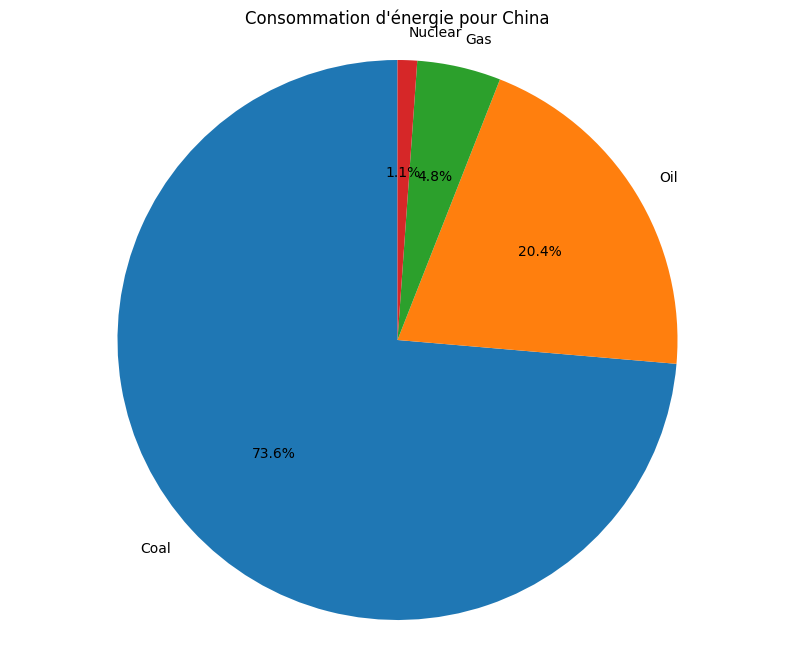

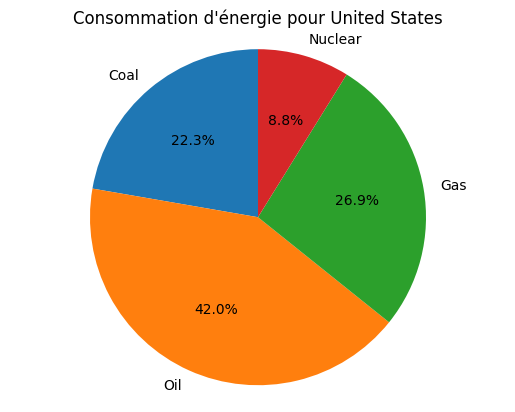

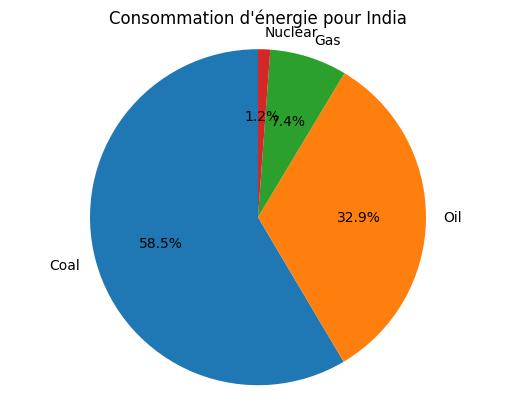

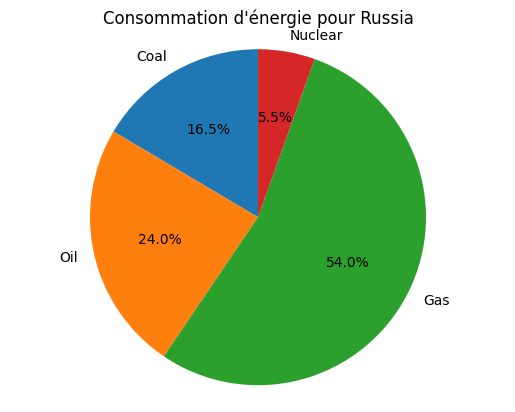

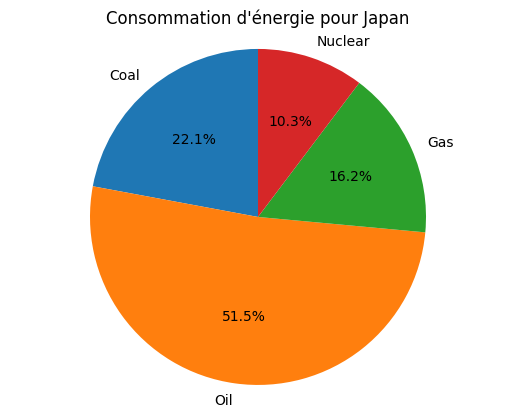

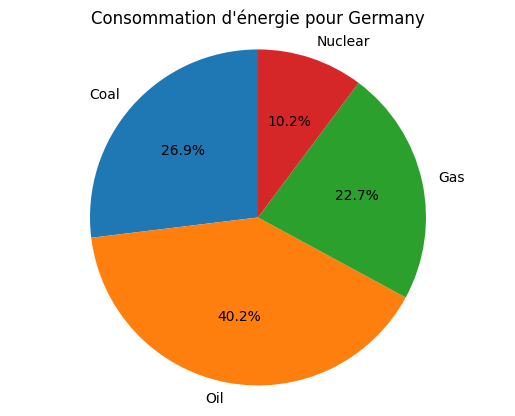

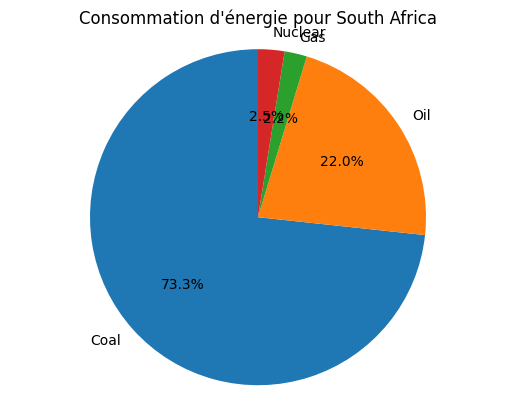

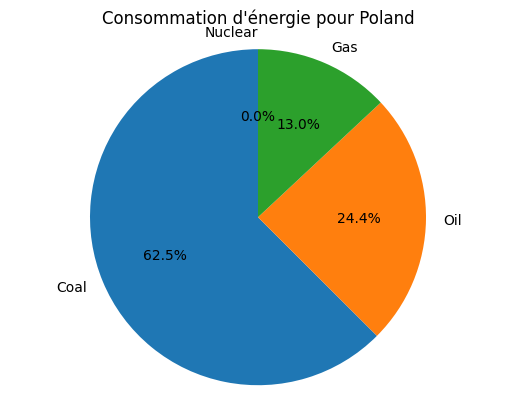

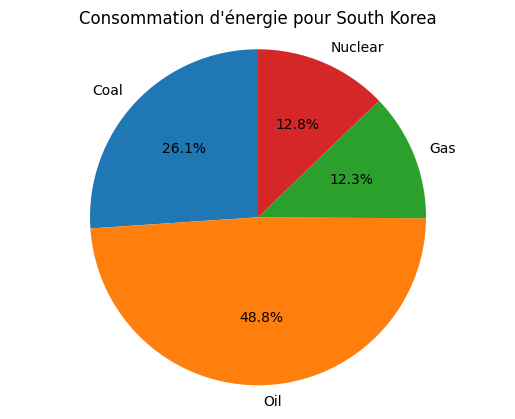

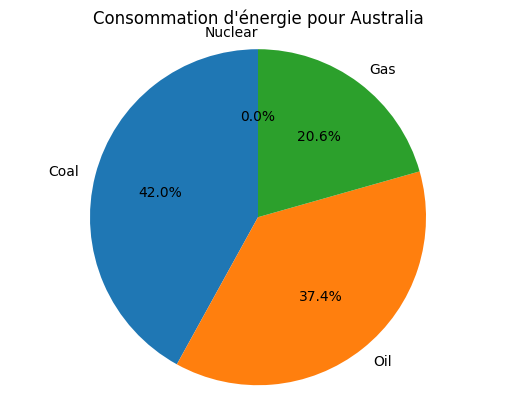

In [129]:
# pie char  du top 10 de total_conso_fossil_nuclear_pays pour chaque pays

# Selection du top 10 des pays
top_10_fossil_nuclear_pays = total_conso_fossil_nuclear_pays.head(10)

# Create the pie chart
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability

# itérarion pour chaque pays dans le top 10
for i in range(len(top_10_fossil_nuclear_pays)):
    Pays_fossil_nuclear = top_10_fossil_nuclear_pays.iloc[i]
    labels = ['Coal', 'Oil', 'Gas', 'Nuclear']
    sizes = [Pays_fossil_nuclear['coal_consumption'],
             Pays_fossil_nuclear['oil_consumption'],
             Pays_fossil_nuclear['gas_consumption'],
             Pays_fossil_nuclear['nuclear_consumption']]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Consommation d\'énergie pour {Pays_fossil_nuclear["pays"]}')
    plt.axis('equal')
    plt.show()